# Human Activity Recognition

## Obtain the input files

In [74]:
# Imports
import os
from sklearn.datasets import load_files
from sklearn.model_selection import train_test_split

# Loading the data
raw_data = load_files(os.getcwd() + r'/Data3', shuffle=False)
files = raw_data['filenames']
targets = raw_data['target']

train_files, test_files, train_targets, test_targets = train_test_split(files, targets, test_size=20, random_state=192)

valid_files = train_files[65:]
valid_targets = train_targets[65:]

train_files = train_files[:65]
train_targets = train_targets[:65]

# Generic details about the data
print('Total number of videos:', len(files))
print('\nNumber of videos in training data:', train_files.shape[0])
print('Number of videos in validation data:', valid_files.shape[0])
print('Number of videos in test data:', test_files.shape[0])

('Total number of videos:', 107)
('\nNumber of videos in training data:', 65)
('Number of videos in validation data:', 22)
('Number of videos in test data:', 20)


### Description of the class labels

In [75]:
print('The categorical labels are converted into integers.\nFollowing is the mapping - \n')
for label in zip(range(6), raw_data['target_names']):
    print(label)

The categorical labels are converted into integers.
Following is the mapping - 

(0, 'handshake2')
(1, 'hug2')
(2, 'kick2')
(3, 'point2')
(4, 'punch2')
(5, 'push2')


### Each video file is associated with its class label

In [76]:
# Displaying the first 5 videos (paths) in the training data along with their labels
# (path of video, class label)
for pair in zip(train_files[:5], train_targets[:5]):
    print(pair)

('/home/geet/project/implementation/CNN/Data3/kick2/38_7_2.avi', 2)
('/home/geet/project/implementation/CNN/Data3/kick2/59_10_2.avi', 2)
('/home/geet/project/implementation/CNN/Data3/punch2/50_19_4.avi', 4)
('/home/geet/project/implementation/CNN/Data3/handshake2/3_11_0.avi', 0)
('/home/geet/project/implementation/CNN/Data3/point2/57_10_3.avi', 3)


('\nShape of the sample data:', (95, 244, 312, 3))


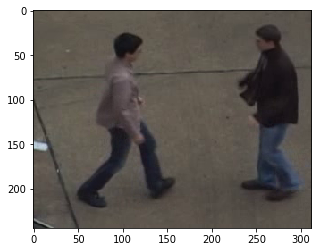

In [77]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import skvideo.io
%matplotlib inline


# The path of a sample video in the training data
sample_files = train_files[:1]

# An object of the class 'Videos'
sample = skvideo.io.vread(sample_files[0]);

print('\nShape of the sample data:', sample.shape)

# Displaying a frame from the sample video
plt.imshow(sample[30])

In [78]:
sec=3
frames_needed=21

In [79]:
import numpy as np
from skvideo.io import FFmpegReader, ffprobe
from skvideo.utils import rgb2gray
from PIL import Image
from keras.preprocessing import image
from tqdm import tqdm
from keras.utils import to_categorical
import cv2
def read_video_bgsub(path,size):


        cap = FFmpegReader(filename=path)
        list_of_frames = []
        fps = int(cap.inputfps)                  # Frame Rate
        
        
        frames_from_sec=int(frames_needed/sec)
        
        frame_alternate=int(fps/frames_from_sec)
        kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3))
        fgbg = cv2.createBackgroundSubtractorMOG2()
        count = 0;
        
        for index, frame in enumerate(cap.nextFrame()):
            temp_image = image.array_to_img(frame)
            #print type(temp_image)
            fgmask = fgbg.apply(frame)
            fgmask = cv2.morphologyEx(fgmask, cv2.MORPH_OPEN, kernel)
            
            fgmaskimg = Image.fromarray(fgmask)
            
            #print type(fgmask)
            frame = image.img_to_array(
                        fgmaskimg.resize(
                            (size, size),
                            Image.ANTIALIAS)).astype('uint8')
            if index%frame_alternate == 0:
                if count < frames_needed:
                    list_of_frames.append(frame);
                    count= count+1;

        temp_video = np.stack(list_of_frames)
        
        ##Extract Specific Frames
        
        total_frames = temp_video.shape[0]
        
        
        
        cap.close()

        temp_video = rgb2gray(temp_video)
                
        return np.expand_dims(temp_video, axis=0)

In [80]:
def read_video_bgsub_flip(path,size):


        cap = FFmpegReader(filename=path)
        #list_of_frames = []
        list_of_frames2 = []
        fps = int(cap.inputfps)                  # Frame Rate
        #T,M,N,C= cap.getShape()
        #frames=int(T)
        
        frames_from_sec=int(frames_needed/sec)
        
        frame_alternate=int(fps/frames_from_sec)
        kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3))
        fgbg = cv2.createBackgroundSubtractorMOG2()
        count = 0;
        
        
#         total_length = frames/fps
#         excess_len = int((total_length-sec)/6)
        
#         excess_frames = excess_len*fps
        
        remove=0
        
            
            
        for index, frame in enumerate(cap.nextFrame()):
            temp_image = image.array_to_img(frame)
            #temp_image2= temp_image.transpose(Image.FLIP_LEFT_RIGHT)
            #temp_image3= image.img_to_array(temp_image2)
            #print type(temp_image)
            fgmask = fgbg.apply(frame)
#             fgmask = image.array_to_image(fgmask)
#             
#             fgmask = image.img_to_array(temp_image2)
            fgmask = cv2.morphologyEx(fgmask, cv2.MORPH_OPEN, kernel)
            #print("fgmask:",type(fgmask))
            #fgmask = fgmask.transpose(Image.FLIP_LEFT_RIGHT)
            fgmask = np.flip(fgmask,1)
            fgmaskimg = Image.fromarray(fgmask)
            
            #print type(fgmask)
            #frame = image.img_to_array(
            #            fgmaskimg.resize(
            #                (size, size),
            #                Image.ANTIALIAS)).astype('uint8')
            frame2 = image.img_to_array(
                        fgmaskimg.resize(
                            (size, size),
                            Image.ANTIALIAS)).astype('uint8')
            
            #remove+=1
            if index%frame_alternate == 0:
                if count < frames_needed:
                    #list_of_frames.append(frame);
                    list_of_frames2.append(frame2);
                    count= count+1;

        temp_video = np.stack(list_of_frames2)
        
        ##Extract Specific Frames
        
        total_frames = temp_video.shape[0]
        
        
        
        cap.close()

        temp_video = rgb2gray(temp_video)
                
        return np.expand_dims(temp_video, axis=0)

In [81]:
def read_video(path):


        cap = FFmpegReader(filename=path)
        list_of_frames = []
        fps = int(cap.inputfps)                  # Frame Rate
        
        frames_from_sec=int(frames_needed/sec)
        
        frame_alternate=int(fps/frames_from_sec)
        count = 0;
        
        for index, frame in enumerate(cap.nextFrame()):
            temp_image = image.array_to_img(frame)
            frame = image.img_to_array(
                        temp_image.resize(
                            (20, 20),
                            Image.ANTIALIAS)).astype('uint8')
            if index%frame_alternate == 0:
                if count < frames_needed:
                    list_of_frames.append(frame);
                    count= count+1;

        temp_video = np.stack(list_of_frames)
        
        ##Extract Specific Frames
        
        total_frames = temp_video.shape[0]
        
        
        
        cap.close()

        temp_video = rgb2gray(temp_video)
                
        return np.expand_dims(temp_video, axis=0)

In [82]:
def read_video_flip(path):


        cap = FFmpegReader(filename=path)
        list_of_frames = []
        list_of_frames2 = []
        fps = int(cap.inputfps)                  # Frame Rate
#         T,M,N,C= cap.getShape()
#         frames=int(T)
        
        frames_from_sec=int(frames_needed/sec)
        
        frame_alternate=int(fps/frames_from_sec)
        count = 0;
        
#         total_length = frames/fps
#         excess_len = int((total_length-sec)/6)
        
#         excess_frames = excess_len*fps
        
        remove=0
                    
            
        for index, frame in enumerate(cap.nextFrame()):
            temp_image = image.array_to_img(frame)
            temp_image2= temp_image.transpose(Image.FLIP_LEFT_RIGHT)
#             frame = image.img_to_array(
#                         temp_image.resize(
#                             (20, 20),
#                             Image.ANTIALIAS)).astype('uint8')
            frame2 = image.img_to_array(
                        temp_image2.resize(
                            (20, 20),
                            Image.ANTIALIAS)).astype('uint8')
#             remove+=1
            if index%frame_alternate == 0:
                if count < frames_needed:
                    #list_of_frames.append(frame);
                    list_of_frames2.append(frame2);
                    count= count+1;

        temp_video = np.stack(list_of_frames2)
        
        ##Extract Specific Frames
        
        total_frames = temp_video.shape[0]
        
        
        
        cap.close()

        temp_video = rgb2gray(temp_video)
                
        return np.expand_dims(temp_video, axis=0)

In [83]:
def read_videos(paths):
 
        list_of_videos = []
        list_of_videos_flip = []
        list_of_videos = [
            read_video(path) for path in tqdm(paths)
        ]
        list_of_videos_flip = [
            read_video_flip(path) for path in tqdm(paths)
        ]

        #print("shape1:", list_of_videos[:].shape)
        list_of_videos+=list_of_videos_flip
        videos = np.vstack(list_of_videos)

        #base = self.normalize_pixels[0]
        #r = self.normalize_pixels[1] - base
        min_ = np.min(videos, axis=(1, 2, 3), keepdims=True)
        max_ = np.max(videos, axis=(1, 2, 3), keepdims=True)
        #return ((videos.astype('float32') - min_) / (max_ - min_)) * r + base
        return ((videos.astype('float32') - min_) / (max_ - min_))


In [84]:
def read_videos_bgsub(paths, size):
     
        #print("shape1:", list_of_videos[:].shape)
        list_of_videos = []
        list_of_videos_flip = []
        list_of_videos = [
            read_video_bgsub(path, size) for path in tqdm(paths)
        ]
        list_of_videos_flip = [
            read_video_bgsub_flip(path, size) for path in tqdm(paths)
        ]
        
        list_of_videos+=list_of_videos_flip
        videos = np.vstack(list_of_videos)

        #base = self.normalize_pixels[0]
        #r = self.normalize_pixels[1] - base
        min_ = np.min(videos, axis=(1, 2, 3), keepdims=True)
        max_ = np.max(videos, axis=(1, 2, 3), keepdims=True)
        #return ((videos.astype('float32') - min_) / (max_ - min_)) * r + base
        return ((videos.astype('float32') - min_) / (max_ - min_))

In [85]:
# Reading training videos and one-hot encoding the training labels
X_train = read_videos(train_files)
y_train = to_categorical(train_targets, num_classes=6)
y_train = np.concatenate((y_train,y_train))
print('Shape of training data:', X_train.shape)
print('Shape of training labels:', y_train.shape)

100%|██████████| 65/65 [00:21<00:00,  3.35it/s]

('Shape of training data:', (130, 21, 20, 20, 1))
('Shape of training labels:', (130, 6))


In [86]:
# Reading validation videos and one-hot encoding the validation labels
X_valid = read_videos(valid_files)
y_valid = to_categorical(valid_targets, num_classes=6)

X_train =  np.concatenate((X_train,X_valid[22:]))
y_train = np.concatenate((y_train,y_valid))
X_valid = X_valid[:22]
print('Shape of validation data:', X_valid.shape)
print('Shape of validation labels:', y_valid.shape)
print('Shape of Train data:', X_train.shape)
print('Shape of Train labels:', y_train.shape)

100%|██████████| 22/22 [00:07<00:00,  3.28it/s]

('Shape of validation data:', (22, 21, 20, 20, 1))
('Shape of validation labels:', (22, 6))
('Shape of Train data:', (152, 21, 20, 20, 1))
('Shape of Train labels:', (152, 6))


In [87]:
# Reading testing videos and one-hot encoding the testing labels
X_test = read_videos(test_files)
y_test = to_categorical(test_targets, num_classes=6)
X_test = X_test[:20]
print('Shape of testing data:', X_test.shape)
print('Shape of testing labels:', y_test.shape)

100%|██████████| 20/20 [00:07<00:00,  3.42it/s]

('Shape of testing data:', (20, 21, 20, 20, 1))
('Shape of testing labels:', (20, 6))


In [88]:
X_train_bgsub = read_videos_bgsub(train_files,20)
y_train_bgsub = to_categorical(train_targets, num_classes=6)
y_train_bgsub = np.concatenate((y_train_bgsub,y_train_bgsub))

print('Shape of training data:', X_train_bgsub.shape)
print('Shape of training labels:', y_train_bgsub.shape)

100%|██████████| 65/65 [00:48<00:00,  1.60it/s]

('Shape of training data:', (130, 21, 20, 20, 1))
('Shape of training labels:', (130, 6))


In [89]:
X_test_bgsub = read_videos_bgsub(test_files,20)
y_test_bgsub = to_categorical(test_targets, num_classes=6)
X_test_bgsub = X_test_bgsub[:20]
print('Shape of testing data:', X_test_bgsub.shape)
print('Shape of testing labels:', y_test_bgsub.shape)

100%|██████████| 20/20 [00:16<00:00,  1.65it/s]

('Shape of testing data:', (20, 21, 20, 20, 1))
('Shape of testing labels:', (20, 6))


In [90]:
X_valid_bgsub = read_videos_bgsub(valid_files,20)
y_valid_bgsub = to_categorical(valid_targets, num_classes=6)

X_train_bgsub =  np.concatenate((X_train_bgsub,X_valid_bgsub[22:]))
y_train_bgsub = np.concatenate((y_train_bgsub,y_valid_bgsub))
X_valid_bgsub = X_valid_bgsub[:22]
print('Shape of validation data:', X_valid_bgsub.shape)
print('Shape of validation labels:', y_valid_bgsub.shape)

100%|██████████| 22/22 [00:16<00:00,  1.49it/s]

('Shape of validation data:', (22, 21, 20, 20, 1))
('Shape of validation labels:', (22, 6))


In [91]:
print(X_train_bgsub[2])

[[[[0.49803922]
   [0.49803922]
   [0.49803922]
   ...
   [0.49803922]
   [0.49803922]
   [0.49803922]]

  [[0.49803922]
   [0.49803922]
   [0.49803922]
   ...
   [0.49803922]
   [0.49803922]
   [0.49803922]]

  [[0.49803922]
   [0.49803922]
   [0.49803922]
   ...
   [0.49803922]
   [0.49803922]
   [0.49803922]]

  ...

  [[0.49803922]
   [0.49803922]
   [0.49803922]
   ...
   [0.49803922]
   [0.49803922]
   [0.49803922]]

  [[0.49803922]
   [0.49803922]
   [0.49803922]
   ...
   [0.49803922]
   [0.49803922]
   [0.49803922]]

  [[0.49803922]
   [0.49803922]
   [0.49803922]
   ...
   [0.49803922]
   [0.49803922]
   [0.49803922]]]


 [[[0.        ]
   [0.        ]
   [0.        ]
   ...
   [0.        ]
   [0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]
   [0.        ]
   ...
   [0.        ]
   [0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]
   [0.        ]
   ...
   [0.        ]
   [0.        ]
   [0.        ]]

  ...

  [[0.        ]
   [0.        ]
   [0. 

('Class of 1st video:', 2)


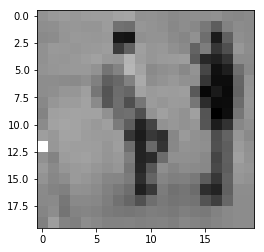

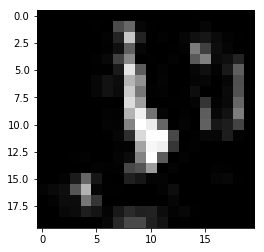

In [92]:
import matplotlib.pyplot as plt
%matplotlib inline

# After pre-processing

# Displaying the 10th frame of the first processed video from the training data
print("Class of 1st video:",y_train[0].argmax());
plt.imshow(np.squeeze(X_train[0][10], axis=2), cmap='gray')
plt.show()
plt.imshow(np.squeeze(X_train_bgsub[0][10], axis=2), cmap='gray')

100%|██████████| 10/10 [00:08<00:00,  1.29it/s]


('Shape of validation data:', (20, 21, 20, 20, 1))
('Shape of validation labels:', (20, 21, 20, 20, 1))
['/home/geet/project/implementation/CNN/Data3/push2/8_12_5.avi'
 '/home/geet/project/implementation/CNN/Data3/hug2/27_5_1.avi'
 '/home/geet/project/implementation/CNN/Data3/punch2/26_15_4.avi'
 '/home/geet/project/implementation/CNN/Data3/point2/4_11_3.avi'
 '/home/geet/project/implementation/CNN/Data3/handshake2/4_1_0.avi'
 '/home/geet/project/implementation/CNN/Data3/point2/45_18_3.avi'
 '/home/geet/project/implementation/CNN/Data3/hug2/32_16_1.avi'
 '/home/geet/project/implementation/CNN/Data3/punch2/12_3_4.avi'
 '/home/geet/project/implementation/CNN/Data3/handshake2/35_7_0.avi'
 '/home/geet/project/implementation/CNN/Data3/handshake2/47_18_0.avi'
 '/home/geet/project/implementation/CNN/Data3/push2/36_7_5.avi'
 '/home/geet/project/implementation/CNN/Data3/hug2/44_18_1.avi'
 '/home/geet/project/implementation/CNN/Data3/kick2/42_18_2.avi'
 '/home/geet/project/implementation/CNN/Dat

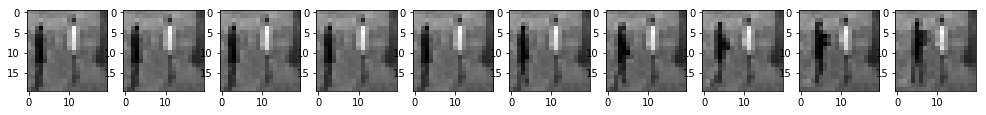

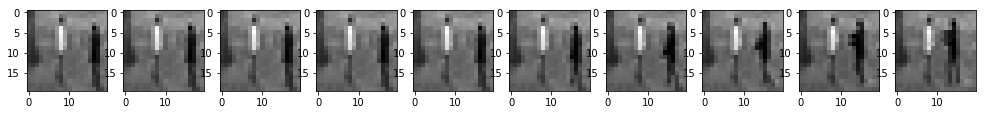

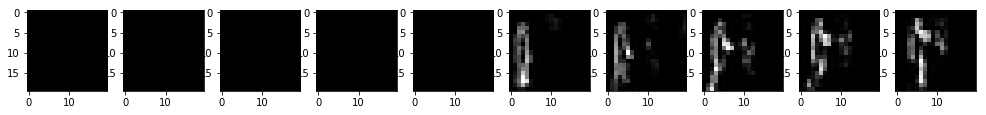

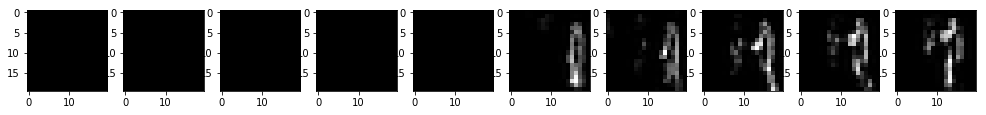

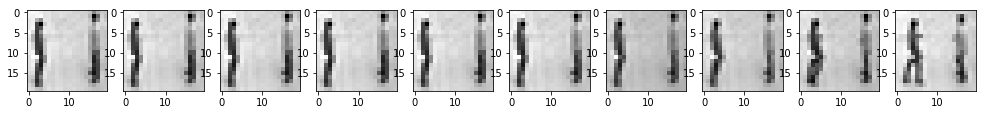

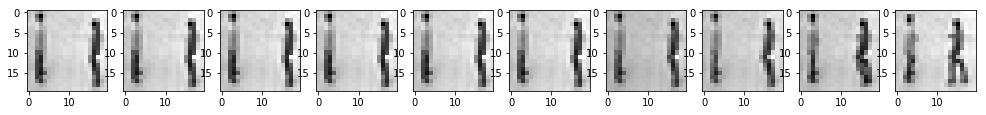

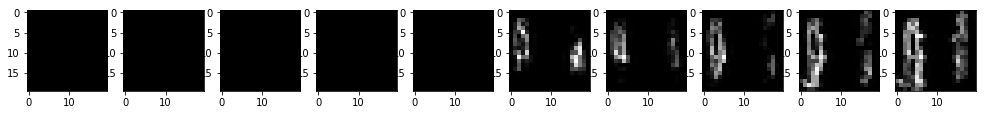

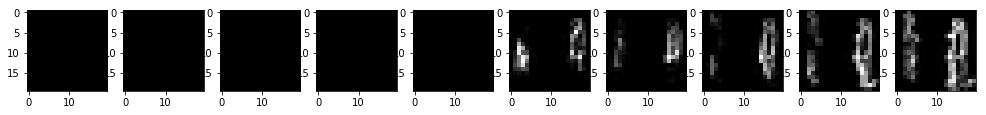

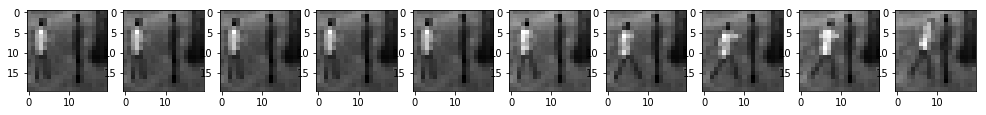

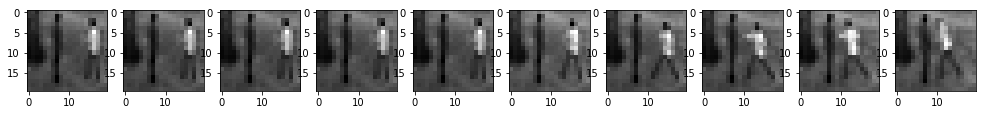

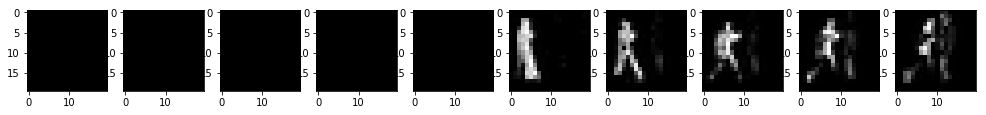

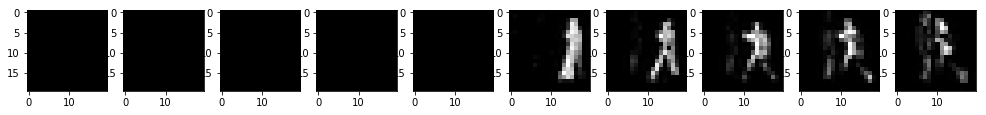

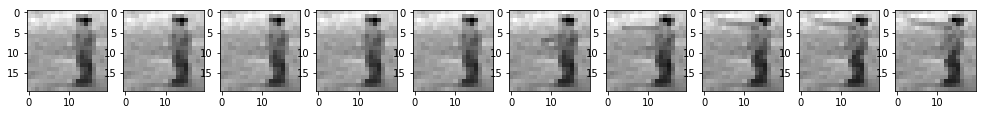

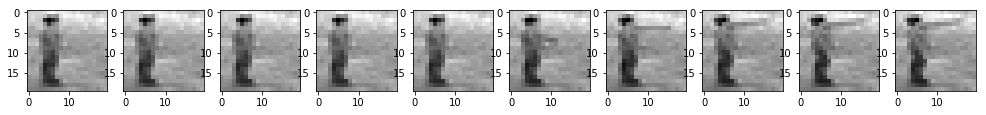

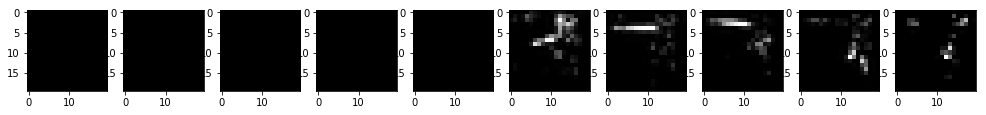

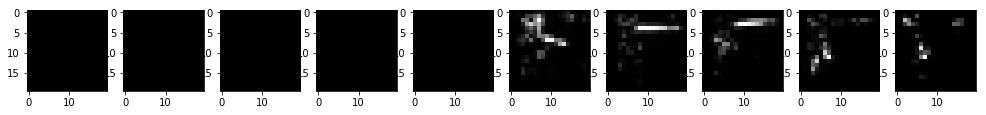

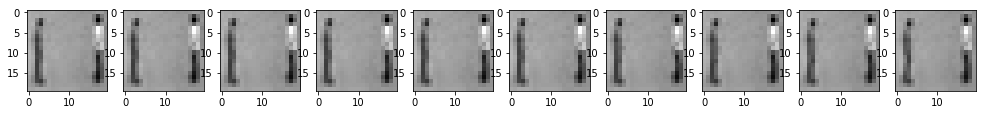

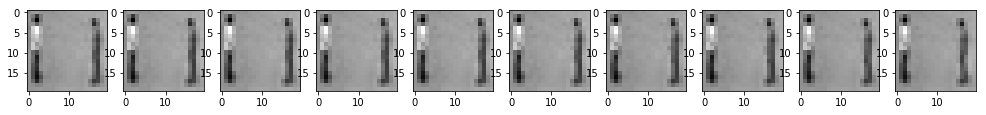

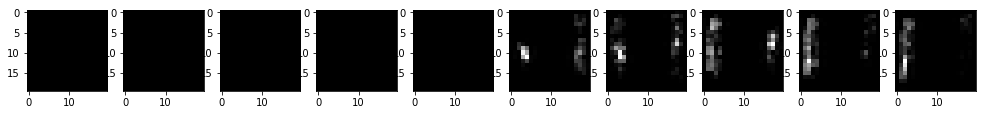

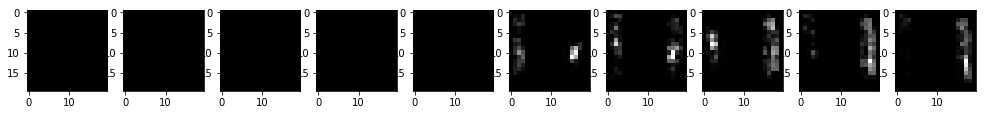

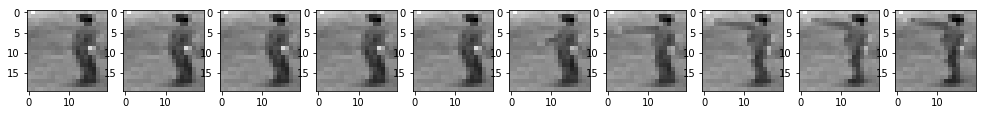

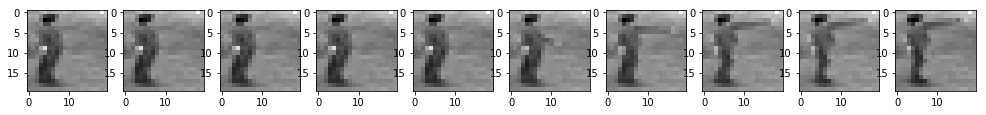

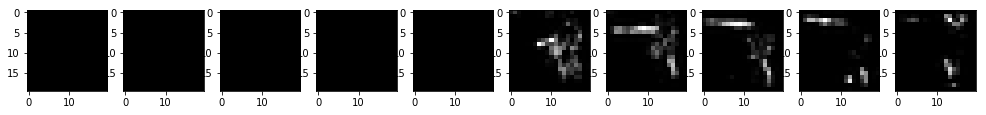

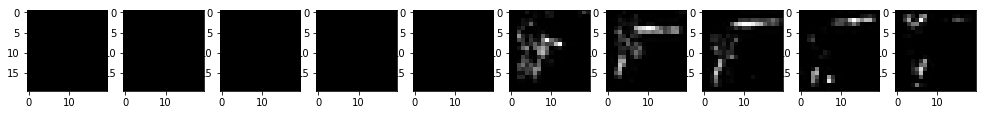

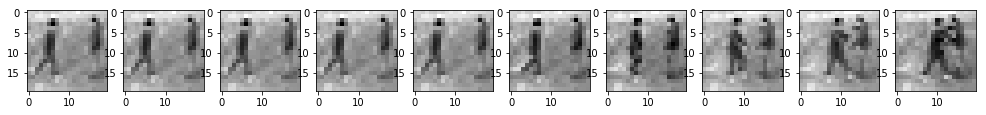

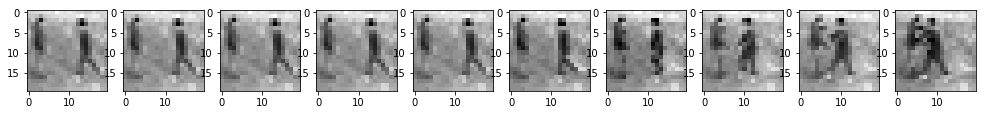

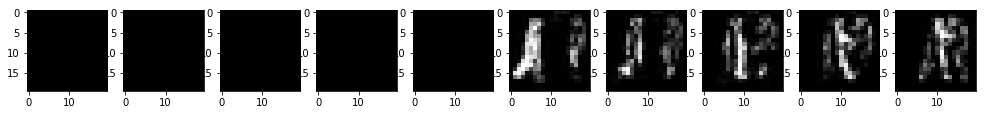

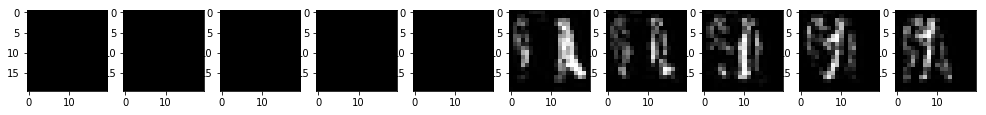

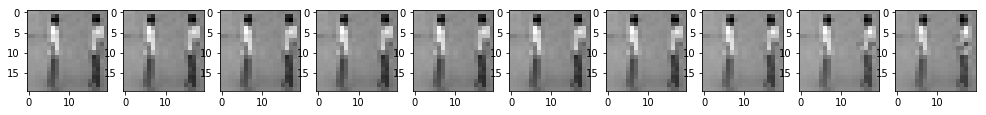

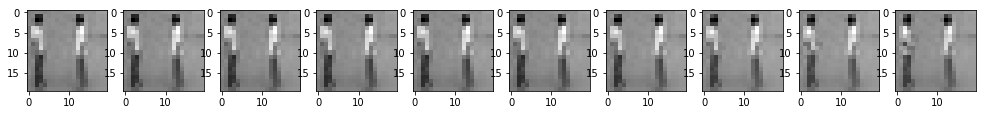

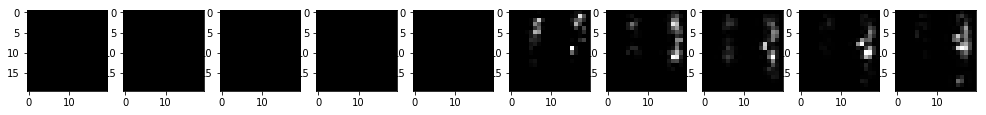

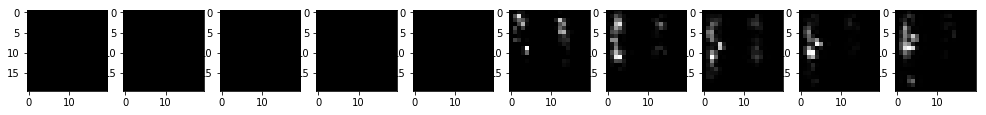

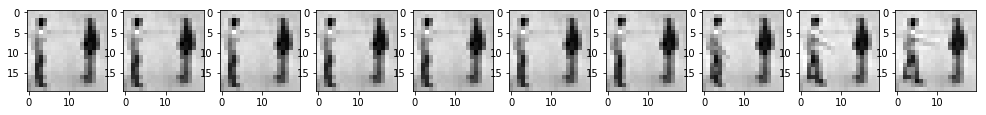

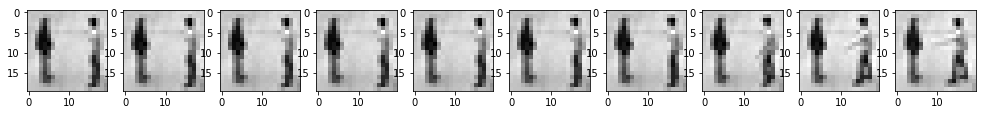

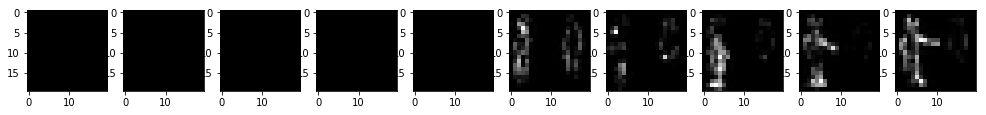

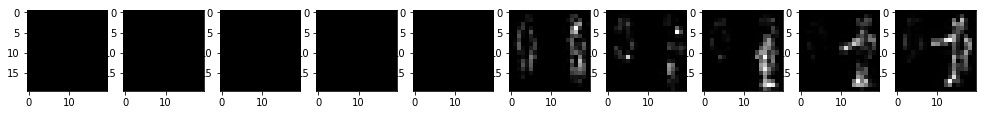

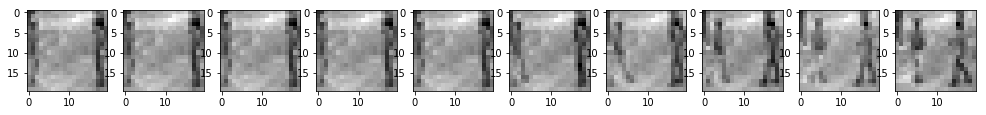

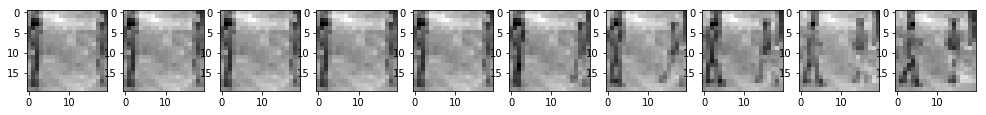

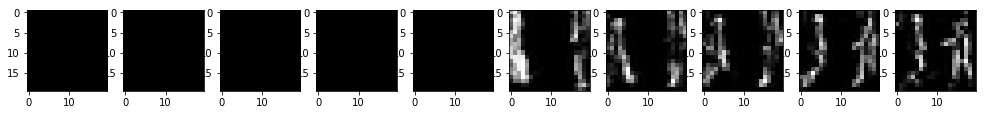

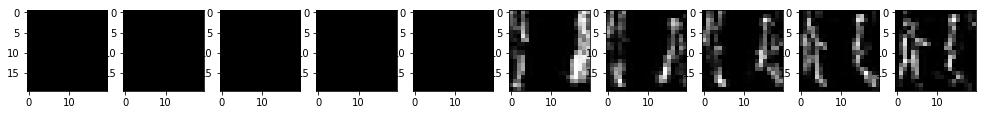

In [93]:
X_sample = read_videos(train_files[20:30])
X_sample_bgsub = read_videos_bgsub(train_files[20:30],20)

print('Shape of validation data:', X_sample.shape)
print('Shape of validation labels:', X_sample_bgsub.shape)
print(train_files[20:50])

from PIL import Image

for j in range(10):
    fig, axes = plt.subplots(1, 10,figsize=(17, 10))
    i=0;


    for frames in X_sample[j][:10]:
    #plt.imshow(frames[0])
            axes[i].imshow(np.squeeze(frames, axis=2), cmap='gray')
            i=i+1;
            #plt.subplots_adjust(wspace=0, hspace=0)
    plt.show()

    fig2, axes2 = plt.subplots(1, 10,figsize=(17, 10))
    i=0;
    for frames in X_sample[j+10][:10]:
    #plt.imshow(frames[0])
            axes2[i].imshow(np.squeeze(frames, axis=2), cmap='gray')
            i=i+1;
            #plt.subplots_adjust(wspace=0, hspace=0)
    plt.show()
    
   
    fig3, axes3 = plt.subplots(1, 10,figsize=(17, 10))
    i=0;
    for frames in X_sample_bgsub[j][:10]:
    #plt.imshow(frames[0])
            axes3[i].imshow(np.squeeze(frames, axis=2), cmap='gray')
            i=i+1;
            #plt.subplots_adjust(wspace=0, hspace=0)
    plt.show()
    
    fig4, axes4 = plt.subplots(1, 10,figsize=(17, 10))
    i=0;
    for frames in X_sample_bgsub[j+10][:10]:
    #plt.imshow(frames[0])
            axes4[i].imshow(np.squeeze(frames, axis=2), cmap='gray')
            i=i+1;
            #plt.subplots_adjust(wspace=0, hspace=0)
    plt.show()

# Model 1 without BG Subtraction

In [94]:
# Imports
from keras.models import Sequential
from keras.layers import Conv3D, MaxPooling3D, GlobalAveragePooling3D
from keras.layers.core import Dense

# Using the Sequential Model
model1 = Sequential()

# Adding Alternate convolutional and pooling layers
model1.add(Conv3D(filters=16, kernel_size=(10, 3, 3), strides=(3, 1, 1), padding='same', activation='relu', 
                 input_shape=X_train.shape[1:]))
model1.add(MaxPooling3D(pool_size=2, strides=(1, 2, 2), padding='same'))

model1.add(Conv3D(filters=64, kernel_size=(5, 3, 3), strides=(1, 1, 1), padding='same', activation='relu'))
model1.add(MaxPooling3D(pool_size=2, strides=(1, 2, 2), padding='same'))


model1.add(GlobalAveragePooling3D())

model1.add(Dense(32, activation='relu'))

model1.add(Dense(6, activation='softmax'))

model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_26 (Conv3D)           (None, 7, 20, 20, 16)     1456      
_________________________________________________________________
max_pooling3d_26 (MaxPooling (None, 7, 10, 10, 16)     0         
_________________________________________________________________
conv3d_27 (Conv3D)           (None, 7, 10, 10, 64)     46144     
_________________________________________________________________
max_pooling3d_27 (MaxPooling (None, 7, 5, 5, 64)       0         
_________________________________________________________________
global_average_pooling3d_10  (None, 64)                0         
_________________________________________________________________
dense_22 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_23 (Dense)             (None, 6)                 198       
Total para

### Training Model - 1

In [95]:
# Imports
from keras.callbacks import ModelCheckpoint

# Compiling the model
model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Saving the model that performed the best on the validation set
checkpoint1 = ModelCheckpoint(filepath='US_Model_1.weights.best.hdf5', save_best_only=True, verbose=1)


history1 = model1.fit(X_train, y_train, batch_size=15, epochs=60, validation_data=(X_valid, y_valid), verbose=2, callbacks=[checkpoint1])
#history = model.fit(X_train, y_train, batch_size=16, epochs=40, verbose=2, callbacks=[checkpoint])

Train on 152 samples, validate on 22 samples
Epoch 1/60
 - 3s - loss: 1.8003 - acc: 0.1711 - val_loss: 1.7932 - val_acc: 0.1818

Epoch 00001: val_loss improved from inf to 1.79319, saving model to US_Model_1.weights.best.hdf5
Epoch 2/60
 - 1s - loss: 1.7895 - acc: 0.1974 - val_loss: 1.7841 - val_acc: 0.1818

Epoch 00002: val_loss improved from 1.79319 to 1.78407, saving model to US_Model_1.weights.best.hdf5
Epoch 3/60
 - 1s - loss: 1.7862 - acc: 0.1974 - val_loss: 1.7973 - val_acc: 0.1818

Epoch 00003: val_loss did not improve from 1.78407
Epoch 4/60
 - 1s - loss: 1.7852 - acc: 0.1974 - val_loss: 1.8130 - val_acc: 0.1818

Epoch 00004: val_loss did not improve from 1.78407
Epoch 5/60
 - 1s - loss: 1.7890 - acc: 0.1908 - val_loss: 1.7927 - val_acc: 0.0000e+00

Epoch 00005: val_loss did not improve from 1.78407
Epoch 6/60
 - 1s - loss: 1.7889 - acc: 0.1974 - val_loss: 1.7880 - val_acc: 0.1818

Epoch 00006: val_loss did not improve from 1.78407
Epoch 7/60
 - 1s - loss: 1.7866 - acc: 0.2039


Epoch 00053: val_loss improved from 1.08152 to 1.02630, saving model to US_Model_1.weights.best.hdf5
Epoch 54/60
 - 1s - loss: 1.2284 - acc: 0.5066 - val_loss: 1.2998 - val_acc: 0.4091

Epoch 00054: val_loss did not improve from 1.02630
Epoch 55/60
 - 1s - loss: 1.2326 - acc: 0.4605 - val_loss: 1.0773 - val_acc: 0.6364

Epoch 00055: val_loss did not improve from 1.02630
Epoch 56/60
 - 1s - loss: 1.1695 - acc: 0.5724 - val_loss: 1.2302 - val_acc: 0.4545

Epoch 00056: val_loss did not improve from 1.02630
Epoch 57/60
 - 1s - loss: 1.2136 - acc: 0.5066 - val_loss: 1.0863 - val_acc: 0.6364

Epoch 00057: val_loss did not improve from 1.02630
Epoch 58/60
 - 1s - loss: 1.2130 - acc: 0.4934 - val_loss: 0.9913 - val_acc: 0.5455

Epoch 00058: val_loss improved from 1.02630 to 0.99134, saving model to US_Model_1.weights.best.hdf5
Epoch 59/60
 - 1s - loss: 1.1912 - acc: 0.5395 - val_loss: 0.9889 - val_acc: 0.6364

Epoch 00059: val_loss improved from 0.99134 to 0.98890, saving model to US_Model_1.

### Evaluating Model - 1

In [96]:
# Loading the model that performed the best on the validation set
model1.load_weights('US_Model_1.weights.best.hdf5')

# Testing the model on the Test data
(loss1, accuracy1) = model1.evaluate(X_test, y_test, batch_size=15, verbose=0)

print('Accuracy on test data: {:.2f}%'.format(accuracy1 * 100))

Accuracy on test data: 45.00%


## Model - 1 Performance



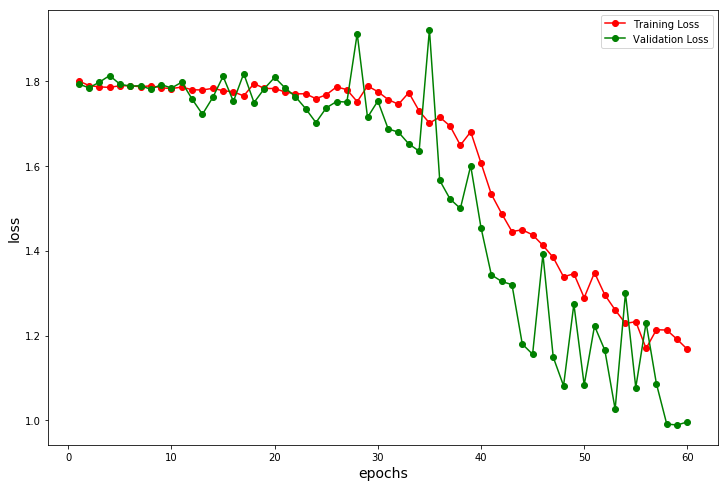

In [97]:
# Making the plot larger
plt.figure(figsize=(12, 8))

loss1 = history1.history['loss']                          # Loss on the training data
val_loss1 = history1.history['val_loss']                  # Loss on the validation data
epochs = range(1,61)

plt.plot(epochs, loss1, 'ro-', label='Training Loss')
plt.plot(epochs, val_loss1, 'go-', label = 'Validation Loss')
plt.xlabel('epochs', fontsize=14)
plt.ylabel('loss', fontsize=14)
plt.legend()

In [98]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.GnBu):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    plt.subplots(1, 1, figsize=(8, 8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
#cnf_matrix = confusion_matrix(y_test, y_pred)
#np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
#plt.figure()
#plot_confusion_matrix(cnf_matrix, classes=class_names,
#                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
#plt.figure()
#plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
#                      title='Normalized confusion matrix')

#plt.show()


/home/geet/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in divide
  if sys.path[0] == '':
/home/geet/anaconda2/lib/python2.7/site-packages/numpy/core/_methods.py:28: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial)


Normalized confusion matrix


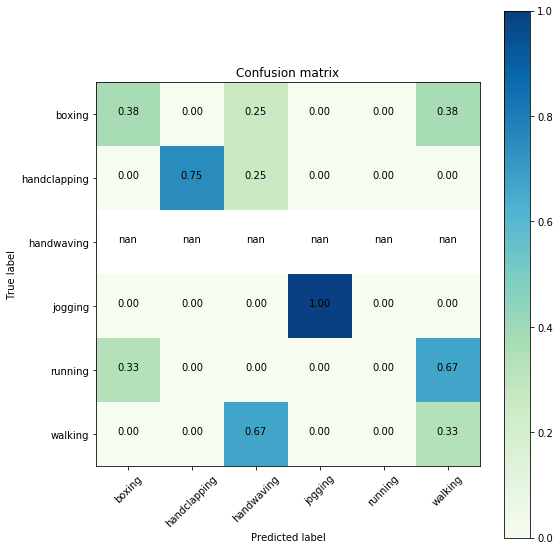

In [99]:
from sklearn.metrics import confusion_matrix
import itertools
y_predictions = model1.predict_classes(X_test);
y_pred=to_categorical(y_predictions, num_classes=6).argmax(axis=1);
y_test_cm = y_test.argmax(axis=1);
#print y_predictions[:10]
#print y_test[:10]
model_cnf_matrix = confusion_matrix(y_test_cm,y_pred);
confusion_matrix_plot = plot_confusion_matrix(model_cnf_matrix, 
                                              classes=['boxing', 'handclapping', 'handwaving', 'jogging', 'running', 'walking'], 
                                              normalize=True)


# Model 1, With BG Subtraction

In [100]:
# Imports
from keras.models import Sequential
from keras.layers import Conv3D, MaxPooling3D, GlobalAveragePooling3D
from keras.layers.core import Dense

# Using the Sequential Model
model1_bg = Sequential()

# Adding Alternate convolutional and pooling layers
model1_bg.add(Conv3D(filters=16, kernel_size=(10, 3, 3), strides=(3, 1, 1), padding='same', activation='relu', 
                 input_shape=X_train.shape[1:]))
model1_bg.add(MaxPooling3D(pool_size=2, strides=(1, 2, 2), padding='same'))

model1_bg.add(Conv3D(filters=64, kernel_size=(5, 3, 3), strides=(1, 1, 1), padding='same', activation='relu'))
model1_bg.add(MaxPooling3D(pool_size=2, strides=(1, 2, 2), padding='same'))


model1_bg.add(GlobalAveragePooling3D())

model1_bg.add(Dense(32, activation='relu'))

model1_bg.add(Dense(6, activation='softmax'))

model1_bg.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_28 (Conv3D)           (None, 7, 20, 20, 16)     1456      
_________________________________________________________________
max_pooling3d_28 (MaxPooling (None, 7, 10, 10, 16)     0         
_________________________________________________________________
conv3d_29 (Conv3D)           (None, 7, 10, 10, 64)     46144     
_________________________________________________________________
max_pooling3d_29 (MaxPooling (None, 7, 5, 5, 64)       0         
_________________________________________________________________
global_average_pooling3d_11  (None, 64)                0         
_________________________________________________________________
dense_24 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_25 (Dense)             (None, 6)                 198       
Total para

In [101]:
# Imports
from keras.callbacks import ModelCheckpoint

# Compiling the model
model1_bg.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Saving the model that performed the best on the validation set
checkpoint_bg = ModelCheckpoint(filepath='US_Model_1_bg.weights.best.hdf5', save_best_only=True, verbose=1)


history1_bg = model1_bg.fit(X_train_bgsub, y_train_bgsub, batch_size=15, epochs=60, validation_data=(X_valid_bgsub, y_valid_bgsub), verbose=1, callbacks=[checkpoint_bg])
#history = model.fit(X_train, y_train, batch_size=16, epochs=40, verbose=2, callbacks=[checkpoint])

Train on 152 samples, validate on 22 samples
Epoch 1/60
152/152 [==============================] - 3s 17ms/step - loss: 1.7884 - acc: 0.1513 - val_loss: 1.7748 - val_acc: 0.1364

Epoch 00001: val_loss improved from inf to 1.77478, saving model to US_Model_1_bg.weights.best.hdf5
Epoch 2/60
152/152 [==============================] - 1s 8ms/step - loss: 1.7663 - acc: 0.1645 - val_loss: 1.7667 - val_acc: 0.1364

Epoch 00002: val_loss improved from 1.77478 to 1.76668, saving model to US_Model_1_bg.weights.best.hdf5
Epoch 3/60
152/152 [==============================] - 1s 8ms/step - loss: 1.7336 - acc: 0.2105 - val_loss: 1.7754 - val_acc: 0.1818

Epoch 00003: val_loss did not improve from 1.76668
Epoch 4/60
152/152 [==============================] - 1s 8ms/step - loss: 1.7107 - acc: 0.2368 - val_loss: 1.7555 - val_acc: 0.1818

Epoch 00004: val_loss improved from 1.76668 to 1.75553, saving model to US_Model_1_bg.weights.best.hdf5
Epoch 5/60
152/152 [==============================] - 1s 9ms/st


Epoch 00039: val_loss did not improve from 0.97588
Epoch 40/60
152/152 [==============================] - 1s 9ms/step - loss: 0.7829 - acc: 0.6842 - val_loss: 1.0139 - val_acc: 0.6818

Epoch 00040: val_loss did not improve from 0.97588
Epoch 41/60
152/152 [==============================] - 1s 9ms/step - loss: 0.7339 - acc: 0.7171 - val_loss: 1.0518 - val_acc: 0.6364

Epoch 00041: val_loss did not improve from 0.97588
Epoch 42/60
152/152 [==============================] - 1s 9ms/step - loss: 0.7755 - acc: 0.7105 - val_loss: 1.0233 - val_acc: 0.6818

Epoch 00042: val_loss did not improve from 0.97588
Epoch 43/60
152/152 [==============================] - 1s 9ms/step - loss: 0.7289 - acc: 0.7237 - val_loss: 0.9166 - val_acc: 0.7273

Epoch 00043: val_loss improved from 0.97588 to 0.91661, saving model to US_Model_1_bg.weights.best.hdf5
Epoch 44/60
152/152 [==============================] - 1s 9ms/step - loss: 0.7586 - acc: 0.7303 - val_loss: 1.0434 - val_acc: 0.6818

Epoch 00044: val_loss

In [102]:
model1_bg.load_weights('US_Model_1_bg.weights.best.hdf5')

# Testing the model on the Test data
(loss1_bg, accuracy1_bg) = model1_bg.evaluate(X_test_bgsub, y_test_bgsub, batch_size=15, verbose=0)

print('Accuracy on test data: {:.2f}%'.format(accuracy1_bg * 100))

Accuracy on test data: 60.00%


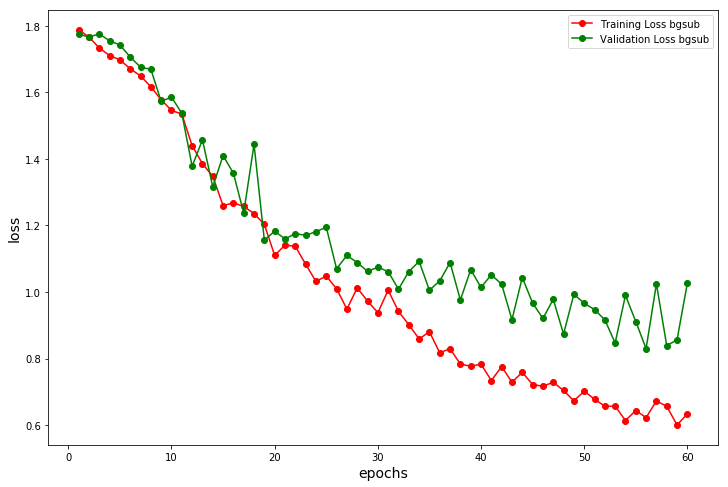

In [103]:
plt.figure(figsize=(12, 8))

loss1_bg = history1_bg.history['loss']                          # Loss on the training data
val_loss1_bg = history1_bg.history['val_loss']                  # Loss on the validation data
epochs = range(1,61)

plt.plot(epochs, loss1_bg, 'ro-', label='Training Loss bgsub')
plt.plot(epochs, val_loss1_bg, 'go-', label = 'Validation Loss bgsub')
plt.xlabel('epochs', fontsize=14)
plt.ylabel('loss', fontsize=14)
plt.legend()

/home/geet/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in divide
  if sys.path[0] == '':


Normalized confusion matrix


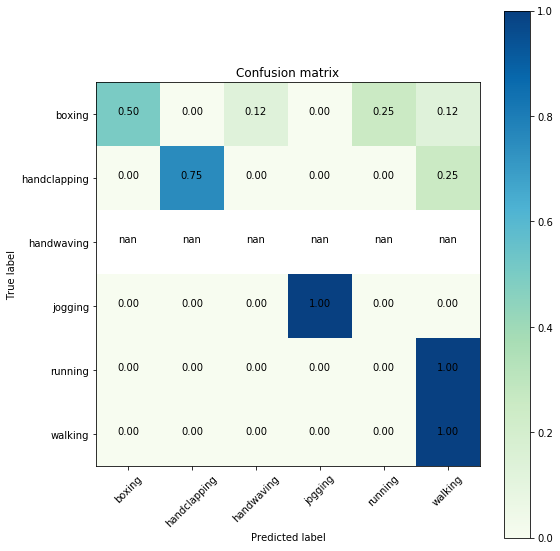

In [104]:
from sklearn.metrics import confusion_matrix
import itertools
y_predictions = model1_bg.predict_classes(X_test_bgsub);
y_pred=to_categorical(y_predictions, num_classes=6).argmax(axis=1);
y_test_cm = y_test_bgsub.argmax(axis=1);
#print y_predictions[:10]
#print y_test[:10]
model_cnf_matrix = confusion_matrix(y_test_cm,y_pred);
confusion_matrix_plot = plot_confusion_matrix(model_cnf_matrix, 
                                              classes=['boxing', 'handclapping', 'handwaving', 'jogging', 'running', 'walking'], 
                                              normalize=True)


## Comparision of Model1 with BG-sub and without BG-sub

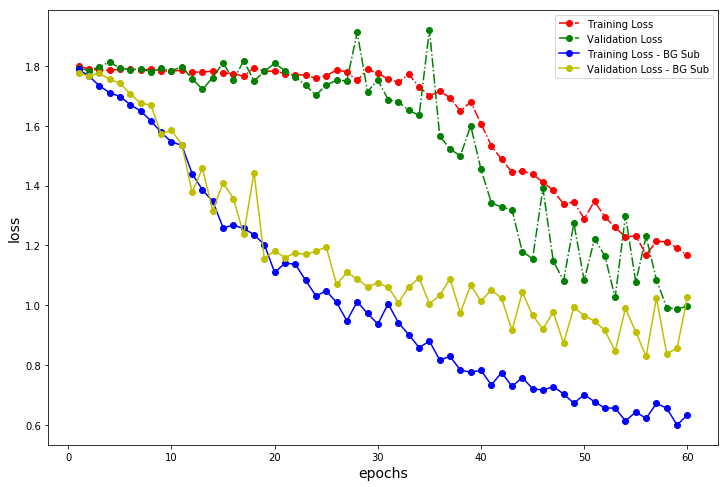

In [105]:
plt.figure(figsize=(12, 8))
plt.plot(epochs, loss1, 'ro-.', label='Training Loss')
plt.plot(epochs, val_loss1, 'go-.', label = 'Validation Loss')
plt.plot(epochs, loss1_bg, 'bo-', label='Training Loss - BG Sub')
plt.plot(epochs, val_loss1_bg, 'yo-', label = 'Validation Loss - BG Sub')
plt.xlabel('epochs', fontsize=14)
plt.ylabel('loss', fontsize=14)
plt.legend()

## Model - 2


In [106]:
# Imports
from keras.models import Sequential
from keras.layers import Conv3D, MaxPooling3D, GlobalAveragePooling3D
from keras.layers.core import Dense, Dropout

# Using the Sequential Model
model2 = Sequential()


model2.add(Conv3D(filters=16, kernel_size=(10, 3, 3), strides=(5, 2, 2), padding='same', activation='relu', 
                 input_shape=X_train.shape[1:]))
model2.add(MaxPooling3D(pool_size=2, strides=(1, 2, 2), padding='same'))

model2.add(Conv3D(filters=64, kernel_size=(5, 3, 3), strides=(3, 1, 1), padding='same', activation='relu'))
model2.add(MaxPooling3D(pool_size=2, strides=(1, 2, 2), padding='same'))

model2.add(Conv3D(filters=256, kernel_size=(3, 3, 3), strides=(3, 1, 1), padding='same', activation='relu'))
model2.add(MaxPooling3D(pool_size=2, strides=(1, 2, 2), padding='same'))


model2.add(GlobalAveragePooling3D())

model2.add(Dense(32, activation='relu'))

#model2.add(Dropout(0.5))

model2.add(Dense(6, activation='softmax'))

model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_30 (Conv3D)           (None, 5, 10, 10, 16)     1456      
_________________________________________________________________
max_pooling3d_30 (MaxPooling (None, 5, 5, 5, 16)       0         
_________________________________________________________________
conv3d_31 (Conv3D)           (None, 2, 5, 5, 64)       46144     
_________________________________________________________________
max_pooling3d_31 (MaxPooling (None, 2, 3, 3, 64)       0         
_________________________________________________________________
conv3d_32 (Conv3D)           (None, 1, 3, 3, 256)      442624    
_________________________________________________________________
max_pooling3d_32 (MaxPooling (None, 1, 2, 2, 256)      0         
_________________________________________________________________
global_average_pooling3d_12  (None, 256)               0         
__________

### Training Model - 2


In [107]:
# Imports
from keras.callbacks import ModelCheckpoint
from keras import optimizers

# Compiling the model
#sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
#adam=optimizers.Adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=1e-8)
#model2.compile(loss='mean_squared_error', optimizer=sgd, metrics=['accuracy'])

#model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model2.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])
# Saving the model that performed the best on the validation set
checkpoint2 = ModelCheckpoint(filepath='US_Model_2.weights.best.hdf5', save_best_only=True, verbose=1)

history2 = model2.fit(X_train, y_train, batch_size=15, epochs=60, 
                    validation_data=(X_valid, y_valid), verbose=2, callbacks=[checkpoint2])

Train on 152 samples, validate on 22 samples
Epoch 1/60
 - 2s - loss: 1.8019 - acc: 0.1250 - val_loss: 1.7904 - val_acc: 0.2273

Epoch 00001: val_loss improved from inf to 1.79045, saving model to US_Model_2.weights.best.hdf5
Epoch 2/60
 - 0s - loss: 1.7916 - acc: 0.1908 - val_loss: 1.7925 - val_acc: 0.1818

Epoch 00002: val_loss did not improve from 1.79045
Epoch 3/60
 - 0s - loss: 1.7916 - acc: 0.1974 - val_loss: 1.7944 - val_acc: 0.1818

Epoch 00003: val_loss did not improve from 1.79045
Epoch 4/60
 - 0s - loss: 1.7910 - acc: 0.1974 - val_loss: 1.7915 - val_acc: 0.1818

Epoch 00004: val_loss did not improve from 1.79045
Epoch 5/60
 - 0s - loss: 1.7904 - acc: 0.1974 - val_loss: 1.7919 - val_acc: 0.1818

Epoch 00005: val_loss did not improve from 1.79045
Epoch 6/60
 - 0s - loss: 1.7903 - acc: 0.1974 - val_loss: 1.7891 - val_acc: 0.1818

Epoch 00006: val_loss improved from 1.79045 to 1.78911, saving model to US_Model_2.weights.best.hdf5
Epoch 7/60
 - 0s - loss: 1.7896 - acc: 0.1974 - v

 - 0s - loss: 0.2305 - acc: 0.9342 - val_loss: 1.6751 - val_acc: 0.5909

Epoch 00054: val_loss did not improve from 0.98073
Epoch 55/60
 - 0s - loss: 0.1846 - acc: 0.9671 - val_loss: 1.1787 - val_acc: 0.6364

Epoch 00055: val_loss did not improve from 0.98073
Epoch 56/60
 - 0s - loss: 0.1673 - acc: 0.9803 - val_loss: 1.5412 - val_acc: 0.6364

Epoch 00056: val_loss did not improve from 0.98073
Epoch 57/60
 - 0s - loss: 0.1820 - acc: 0.9605 - val_loss: 1.5866 - val_acc: 0.5455

Epoch 00057: val_loss did not improve from 0.98073
Epoch 58/60
 - 0s - loss: 0.1569 - acc: 0.9868 - val_loss: 1.5664 - val_acc: 0.5909

Epoch 00058: val_loss did not improve from 0.98073
Epoch 59/60
 - 0s - loss: 0.1172 - acc: 0.9868 - val_loss: 1.6777 - val_acc: 0.5909

Epoch 00059: val_loss did not improve from 0.98073
Epoch 60/60
 - 0s - loss: 0.1085 - acc: 0.9934 - val_loss: 1.7453 - val_acc: 0.5909

Epoch 00060: val_loss did not improve from 0.98073


### Evaluating Model - 2

Evaluating `Model-2` on the test data.

In [108]:
# Loading the model that performed the best on the validation set
model2.load_weights('Model_2.weights.best.hdf5')

# Testing the model on the Test data
(loss2, accuracy2) = model2.evaluate(X_test, y_test, batch_size=15, verbose=0)

print('Accuracy on test data: {:.2f}%'.format(accuracy2 * 100))

Accuracy on test data: 40.00%


## Model - 2 Performance



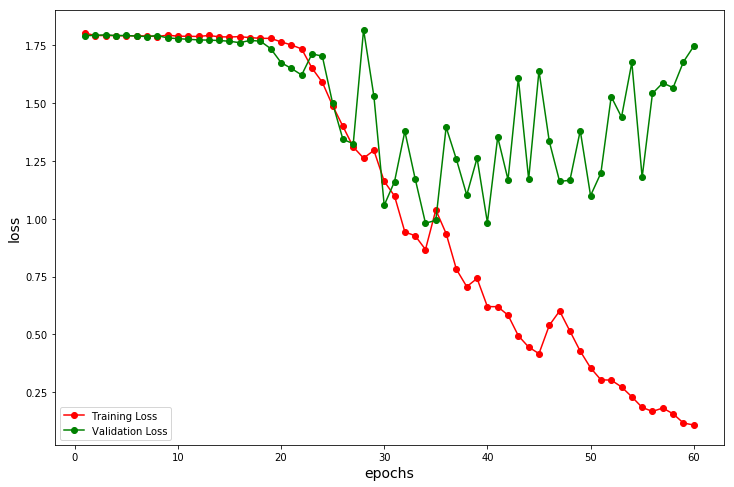

In [109]:
# Making the plot larger
plt.figure(figsize=(12, 8))

loss2 = history2.history['loss']                          # Loss on the training data
val_loss2 = history2.history['val_loss']                  # Loss on the validation data
epochs = range(1, 61)

plt.plot(epochs, loss2, 'ro-', label='Training Loss')
plt.plot(epochs, val_loss2, 'go-', label = 'Validation Loss')
plt.xlabel('epochs', fontsize=14)
plt.ylabel('loss', fontsize=14)
plt.legend()

Normalized confusion matrix


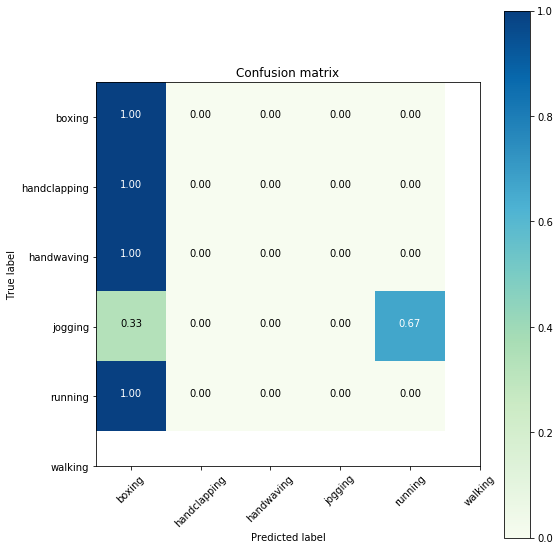

In [110]:
from sklearn.metrics import confusion_matrix
import itertools
y_predictions2 = model2.predict_classes(X_test);
y_pred2=to_categorical(y_predictions2, num_classes=6).argmax(axis=1);
y_test_cm = y_test.argmax(axis=1);
#print y_predictions[:10]
#print y_test[:10]
model_cnf_matrix = confusion_matrix(y_test_cm,y_pred2);
confusion_matrix_plot = plot_confusion_matrix(model_cnf_matrix, 
                                              classes=['boxing', 'handclapping', 'handwaving', 'jogging', 'running', 'walking'], 
                                              normalize=True)


# Model 2 - With BG

In [111]:
# Imports
from keras.models import Sequential
from keras.layers import Conv3D, MaxPooling3D, GlobalAveragePooling3D
from keras.layers.core import Dense, Dropout

# Using the Sequential Model
model2_bg = Sequential()


model2_bg.add(Conv3D(filters=16, kernel_size=(10, 3, 3), strides=(5, 2, 2), padding='same', activation='relu', 
                 input_shape=X_train.shape[1:]))
model2_bg.add(MaxPooling3D(pool_size=2, strides=(1, 2, 2), padding='same'))

model2_bg.add(Conv3D(filters=64, kernel_size=(5, 3, 3), strides=(3, 1, 1), padding='same', activation='relu'))
model2_bg.add(MaxPooling3D(pool_size=2, strides=(1, 2, 2), padding='same'))

model2_bg.add(Conv3D(filters=256, kernel_size=(3, 3, 3), strides=(3, 1, 1), padding='same', activation='relu'))
model2_bg.add(MaxPooling3D(pool_size=2, strides=(1, 2, 2), padding='same'))


model2_bg.add(GlobalAveragePooling3D())

model2_bg.add(Dense(32, activation='relu'))

#model2.add(Dropout(0.5))

model2_bg.add(Dense(6, activation='softmax'))

model2_bg.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_33 (Conv3D)           (None, 5, 10, 10, 16)     1456      
_________________________________________________________________
max_pooling3d_33 (MaxPooling (None, 5, 5, 5, 16)       0         
_________________________________________________________________
conv3d_34 (Conv3D)           (None, 2, 5, 5, 64)       46144     
_________________________________________________________________
max_pooling3d_34 (MaxPooling (None, 2, 3, 3, 64)       0         
_________________________________________________________________
conv3d_35 (Conv3D)           (None, 1, 3, 3, 256)      442624    
_________________________________________________________________
max_pooling3d_35 (MaxPooling (None, 1, 2, 2, 256)      0         
_________________________________________________________________
global_average_pooling3d_13  (None, 256)               0         
__________

In [112]:
# Imports
from keras.callbacks import ModelCheckpoint
from keras import optimizers

# Compiling the model
#sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
#adam=optimizers.Adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=1e-8)
#model2.compile(loss='mean_squared_error', optimizer=sgd, metrics=['accuracy'])

#model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model2_bg.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])
# Saving the model that performed the best on the validation set
checkpoint2_bg = ModelCheckpoint(filepath='US_Model_2_bg.weights.best.hdf5', save_best_only=True, verbose=1)


history2_bg = model2_bg.fit(X_train_bgsub, y_train_bgsub, batch_size=15, epochs=60, 
                    validation_data=(X_valid_bgsub, y_valid_bgsub), verbose=2, callbacks=[checkpoint2_bg])

Train on 152 samples, validate on 22 samples
Epoch 1/60
 - 2s - loss: 1.7733 - acc: 0.1645 - val_loss: 1.7291 - val_acc: 0.2273

Epoch 00001: val_loss improved from inf to 1.72908, saving model to US_Model_2_bg.weights.best.hdf5
Epoch 2/60
 - 0s - loss: 1.6756 - acc: 0.2566 - val_loss: 1.6416 - val_acc: 0.3636

Epoch 00002: val_loss improved from 1.72908 to 1.64163, saving model to US_Model_2_bg.weights.best.hdf5
Epoch 3/60
 - 0s - loss: 1.5923 - acc: 0.4211 - val_loss: 1.8576 - val_acc: 0.4091

Epoch 00003: val_loss did not improve from 1.64163
Epoch 4/60
 - 0s - loss: 1.4788 - acc: 0.4276 - val_loss: 1.6404 - val_acc: 0.5000

Epoch 00004: val_loss improved from 1.64163 to 1.64043, saving model to US_Model_2_bg.weights.best.hdf5
Epoch 5/60
 - 0s - loss: 1.3599 - acc: 0.4474 - val_loss: 1.5003 - val_acc: 0.4545

Epoch 00005: val_loss improved from 1.64043 to 1.50034, saving model to US_Model_2_bg.weights.best.hdf5
Epoch 6/60
 - 0s - loss: 1.2764 - acc: 0.4803 - val_loss: 1.3172 - val_a

 - 0s - loss: 0.0043 - acc: 1.0000 - val_loss: 0.8742 - val_acc: 0.8636

Epoch 00056: val_loss did not improve from 0.58929
Epoch 57/60
 - 0s - loss: 0.0040 - acc: 1.0000 - val_loss: 0.8704 - val_acc: 0.8636

Epoch 00057: val_loss did not improve from 0.58929
Epoch 58/60
 - 0s - loss: 0.0037 - acc: 1.0000 - val_loss: 0.9048 - val_acc: 0.8182

Epoch 00058: val_loss did not improve from 0.58929
Epoch 59/60
 - 0s - loss: 0.0036 - acc: 1.0000 - val_loss: 0.9255 - val_acc: 0.8182

Epoch 00059: val_loss did not improve from 0.58929
Epoch 60/60
 - 0s - loss: 0.0034 - acc: 1.0000 - val_loss: 0.9092 - val_acc: 0.8636

Epoch 00060: val_loss did not improve from 0.58929


In [113]:
# Loading the model that performed the best on the validation set
model2_bg.load_weights('Model_2_bg.weights.best.hdf5')

# Testing the model on the Test data
(loss2_bg, accuracy2_bg) = model2_bg.evaluate(X_test_bgsub, y_test_bgsub, batch_size=15, verbose=0)

print('Accuracy on test data: {:.2f}%'.format(accuracy2_bg * 100))

Accuracy on test data: 20.00%


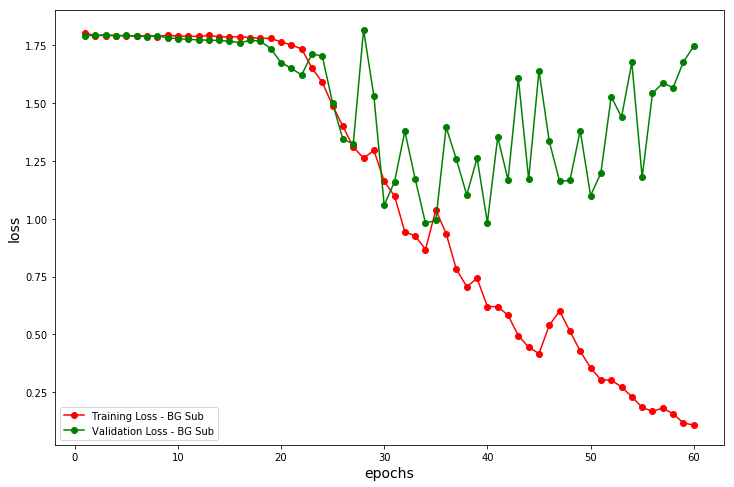

In [114]:
# Making the plot larger
plt.figure(figsize=(12, 8))

loss2_bg = history2_bg.history['loss']                          # Loss on the training data
val_loss2_bg = history2_bg.history['val_loss']                  # Loss on the validation data
epochs = range(1, 61)

plt.plot(epochs, loss2, 'ro-', label='Training Loss - BG Sub')
plt.plot(epochs, val_loss2, 'go-', label = 'Validation Loss - BG Sub')
plt.xlabel('epochs', fontsize=14)
plt.ylabel('loss', fontsize=14)
plt.legend()

Normalized confusion matrix


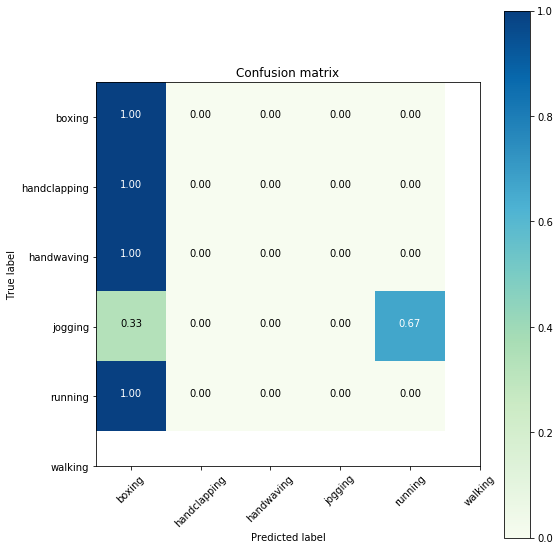

In [115]:
from sklearn.metrics import confusion_matrix
import itertools
y_predictions2_bg = model2_bg.predict_classes(X_test_bgsub);
y_pred2_bg=to_categorical(y_predictions2, num_classes=6).argmax(axis=1);
y_test_cm = y_test.argmax(axis=1);
#print y_predictions[:10]
#print y_test[:10]
model_cnf_matrix = confusion_matrix(y_test_cm,y_pred2_bg);
confusion_matrix_plot = plot_confusion_matrix(model_cnf_matrix, 
                                              classes=['boxing', 'handclapping', 'handwaving', 'jogging', 'running', 'walking'], 
                                              normalize=True)


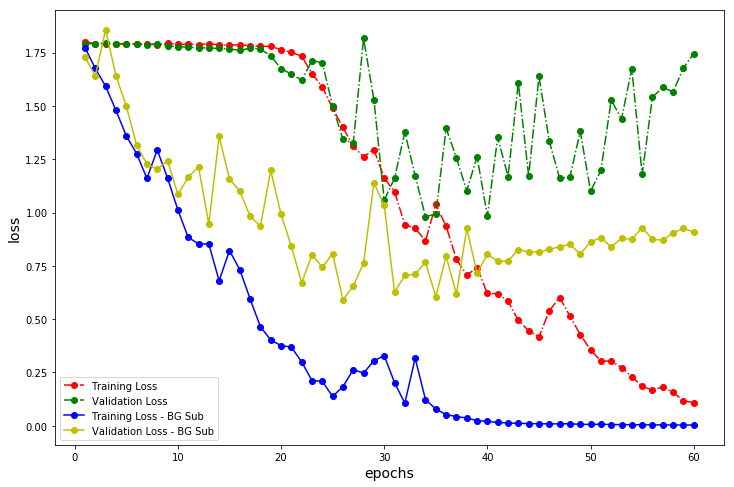

In [116]:
plt.figure(figsize=(12, 8))
plt.plot(epochs, loss2, 'ro-.', label='Training Loss')
plt.plot(epochs, val_loss2, 'go-.', label = 'Validation Loss')
plt.plot(epochs, loss2_bg, 'bo-', label='Training Loss - BG Sub')
plt.plot(epochs, val_loss2_bg, 'yo-', label = 'Validation Loss - BG Sub')
plt.xlabel('epochs', fontsize=14)
plt.ylabel('loss', fontsize=14)
plt.legend()

# The model that worked

In [117]:
# from keras.models import Sequential
from keras.layers import Conv3D, MaxPooling3D, GlobalAveragePooling3D, BatchNormalization
from keras.layers.core import Dense, Dropout

# Using the Sequential Model
model3 = Sequential()

# Adding Alternate convolutional and pooling layers
model3.add(Conv3D(filters=16, kernel_size=(5, 3, 3), strides=(1, 1, 1), padding='same', activation='relu', 
                 input_shape=X_train.shape[1:]))
model3.add(MaxPooling3D(pool_size=2, strides=(2, 2, 2), padding='same'))

model3.add(Conv3D(filters=64, kernel_size=(2, 3, 3), strides=(1, 1, 1), padding='same', activation='relu'))
model3.add(MaxPooling3D(pool_size=2, strides=(2, 2, 2), padding='same'))

model3.add(Conv3D(filters=256, kernel_size=(2, 3, 3), strides=(1, 1, 1), padding='same', activation='relu'))
model3.add(MaxPooling3D(pool_size=2, strides=(2, 2, 2), padding='same'))

#model.add(Conv3D(filters=1024, kernel_size=(2, 3, 3), strides=(1, 1, 1), padding='same', activation='relu'))
#model.add(MaxPooling3D(pool_size=2, strides=(2, 2, 2), padding='same'))

# A global average pooling layer to get a 1-d vector
# The vector will have a depth (same as number of elements in the vector) of 1024
model3.add(GlobalAveragePooling3D())

# Hidden layer
model3.add(Dense(32, activation='relu'))

# Dropout Layer
model3.add(Dropout(0.5))

# Output layer
model3.add(Dense(6, activation='softmax'))

model3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_36 (Conv3D)           (None, 21, 20, 20, 16)    736       
_________________________________________________________________
max_pooling3d_36 (MaxPooling (None, 11, 10, 10, 16)    0         
_________________________________________________________________
conv3d_37 (Conv3D)           (None, 11, 10, 10, 64)    18496     
_________________________________________________________________
max_pooling3d_37 (MaxPooling (None, 6, 5, 5, 64)       0         
_________________________________________________________________
conv3d_38 (Conv3D)           (None, 6, 5, 5, 256)      295168    
_________________________________________________________________
max_pooling3d_38 (MaxPooling (None, 3, 3, 3, 256)      0         
_________________________________________________________________
global_average_pooling3d_14  (None, 256)               0         
__________

In [118]:
model3 = Sequential()

# Adding Alternate convolutional and pooling layers
model3.add(Conv3D(filters=16, kernel_size=(5, 5, 5), strides=(1, 1, 1), padding='same', activation='relu', 
                 input_shape=X_train.shape[1:]))
model3.add(MaxPooling3D(pool_size=2, strides=(2, 2, 2), padding='same'))

model3.add(Conv3D(filters=64, kernel_size=(3, 3, 3), strides=(1, 1, 1), padding='same', activation='relu'))
model3.add(MaxPooling3D(pool_size=2, strides=(2, 2, 2), padding='same'))

model3.add(Conv3D(filters=128, kernel_size=(3, 3, 3), strides=(1, 1, 1), padding='same', activation='relu'))
model3.add(MaxPooling3D(pool_size=2, strides=(2, 2, 2), padding='same'))

#model.add(Conv3D(filters=1024, kernel_size=(2, 3, 3), strides=(1, 1, 1), padding='same', activation='relu'))
#model.add(MaxPooling3D(pool_size=2, strides=(2, 2, 2), padding='same'))

# A global average pooling layer to get a 1-d vector
# The vector will have a depth (same as number of elements in the vector) of 1024
model3.add(GlobalAveragePooling3D())
model3.add(Dropout(0.3))
# Hidden layer
model3.add(Dense(64, activation='relu'))
model3.add(Dropout(0.3))
model3.add(Dense(32, activation='relu'))

# Dropout Layer
model3.add(Dropout(0.5))

# Output layer
model3.add(Dense(6, activation='softmax'))

model3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_39 (Conv3D)           (None, 21, 20, 20, 16)    2016      
_________________________________________________________________
max_pooling3d_39 (MaxPooling (None, 11, 10, 10, 16)    0         
_________________________________________________________________
conv3d_40 (Conv3D)           (None, 11, 10, 10, 64)    27712     
_________________________________________________________________
max_pooling3d_40 (MaxPooling (None, 6, 5, 5, 64)       0         
_________________________________________________________________
conv3d_41 (Conv3D)           (None, 6, 5, 5, 128)      221312    
_________________________________________________________________
max_pooling3d_41 (MaxPooling (None, 3, 3, 3, 128)      0         
_________________________________________________________________
global_average_pooling3d_15  (None, 128)               0         
__________

In [119]:
# Imports
from keras.callbacks import ModelCheckpoint

# Compiling the model
model3.compile(loss='categorical_crossentropy', optimizer='nadam', metrics=['accuracy'])

# Saving the model that performed the best on the validation set
checkpoint3 = ModelCheckpoint(filepath='US_Model_3.weights.best.hdf5', save_best_only=True, verbose=1)


history3 = model3.fit(X_train, y_train, batch_size=15, epochs=100, 
                    validation_data=(X_valid, y_valid), verbose=2, callbacks=[checkpoint3])

Train on 152 samples, validate on 22 samples
Epoch 1/100
 - 5s - loss: 1.8012 - acc: 0.1579 - val_loss: 1.7897 - val_acc: 0.2273

Epoch 00001: val_loss improved from inf to 1.78969, saving model to US_Model_3.weights.best.hdf5
Epoch 2/100
 - 3s - loss: 1.7905 - acc: 0.1776 - val_loss: 1.7894 - val_acc: 0.2273

Epoch 00002: val_loss improved from 1.78969 to 1.78945, saving model to US_Model_3.weights.best.hdf5
Epoch 3/100
 - 2s - loss: 1.7902 - acc: 0.1382 - val_loss: 1.7888 - val_acc: 0.1818

Epoch 00003: val_loss improved from 1.78945 to 1.78875, saving model to US_Model_3.weights.best.hdf5
Epoch 4/100
 - 3s - loss: 1.7896 - acc: 0.1645 - val_loss: 1.7890 - val_acc: 0.1818

Epoch 00004: val_loss did not improve from 1.78875
Epoch 5/100
 - 3s - loss: 1.7883 - acc: 0.2039 - val_loss: 1.7854 - val_acc: 0.1818

Epoch 00005: val_loss improved from 1.78875 to 1.78541, saving model to US_Model_3.weights.best.hdf5
Epoch 6/100
 - 3s - loss: 1.7867 - acc: 0.1908 - val_loss: 1.7822 - val_acc: 0.

 - 3s - loss: 1.7883 - acc: 0.1974 - val_loss: 1.7660 - val_acc: 0.1818

Epoch 00057: val_loss did not improve from 1.76286
Epoch 58/100
 - 3s - loss: 1.7848 - acc: 0.1776 - val_loss: 1.7652 - val_acc: 0.1818

Epoch 00058: val_loss did not improve from 1.76286
Epoch 59/100
 - 3s - loss: 1.7863 - acc: 0.1842 - val_loss: 1.7647 - val_acc: 0.1818

Epoch 00059: val_loss did not improve from 1.76286
Epoch 60/100
 - 3s - loss: 1.7830 - acc: 0.1908 - val_loss: 1.7664 - val_acc: 0.1818

Epoch 00060: val_loss did not improve from 1.76286
Epoch 61/100
 - 3s - loss: 1.7846 - acc: 0.2039 - val_loss: 1.7663 - val_acc: 0.1818

Epoch 00061: val_loss did not improve from 1.76286
Epoch 62/100
 - 3s - loss: 1.7860 - acc: 0.2039 - val_loss: 1.7695 - val_acc: 0.1818

Epoch 00062: val_loss did not improve from 1.76286
Epoch 63/100
 - 3s - loss: 1.7895 - acc: 0.1974 - val_loss: 1.7706 - val_acc: 0.1818

Epoch 00063: val_loss did not improve from 1.76286
Epoch 64/100
 - 3s - loss: 1.7836 - acc: 0.2039 - val_

In [120]:
# Loading the model that performed the best on the validation set
model3.load_weights('US_Model_3.weights.best.hdf5')

# Testing the model on the Test data
(loss3, accuracy3) = model3.evaluate(X_test, y_test, batch_size=16, verbose=0)

print('Accuracy on test data: {:.2f}%'.format(accuracy3 * 100))

Accuracy on test data: 15.00%


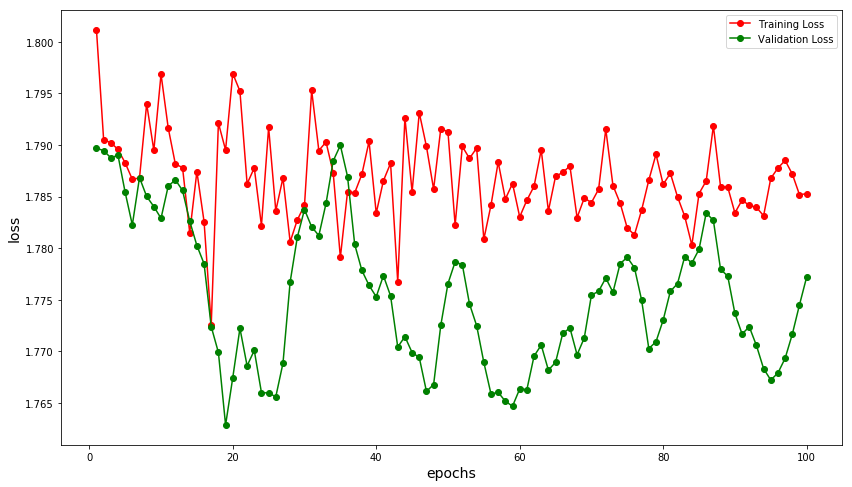

In [121]:
# Making the plot larger
plt.figure(figsize=(14, 8))

loss3 = history3.history['loss']                          # Loss on the training data
val_loss3 = history3.history['val_loss']                  # Loss on the validation data
epochs = range(1, 101)

plt.plot(epochs, loss3, 'ro-', label='Training Loss')
plt.plot(epochs, val_loss3, 'go-', label = 'Validation Loss')
plt.xlabel('epochs', fontsize=14)
plt.ylabel('loss', fontsize=14)
plt.legend()

Normalized confusion matrix


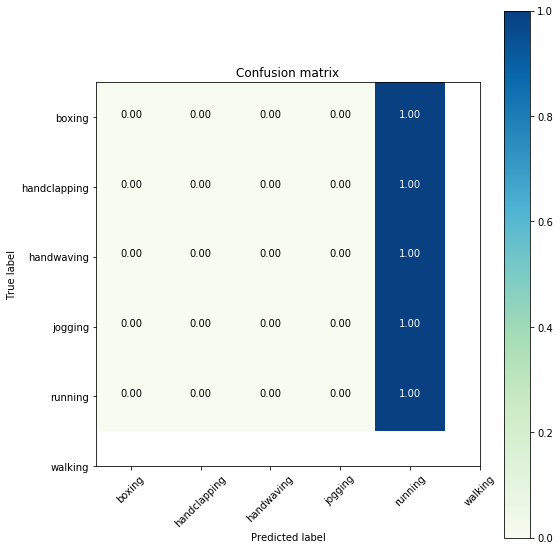

In [122]:
from sklearn.metrics import confusion_matrix
import itertools
y_predictions3 = model3.predict_classes(X_test);
y_pred3=to_categorical(y_predictions3, num_classes=6).argmax(axis=1);
y_test_cm = y_test.argmax(axis=1);

#print y_predictions3[:50]
#print y_test[:50]
model_cnf_matrix3 = confusion_matrix(y_test_cm,y_pred3);
#print(model_cnf_matrix3)
confusion_matrix_plot = plot_confusion_matrix(model_cnf_matrix3, 
                                              classes=['boxing', 'handclapping', 'handwaving', 'jogging', 'running', 'walking'], 
                                              normalize=True)


## Model3 BG Subtraction

In [123]:
from keras.models import Sequential
from keras.layers import Conv3D, MaxPooling3D, GlobalAveragePooling3D, BatchNormalization
from keras.layers.core import Dense, Dropout

# Using the Sequential Model
model3_bg = Sequential()

# Adding Alternate convolutional and pooling layers
model3_bg.add(Conv3D(filters=16, kernel_size=(5, 5, 5), strides=(1, 1, 1), padding='same', activation='relu', 
                 input_shape=X_train.shape[1:]))
model3_bg.add(MaxPooling3D(pool_size=2, strides=(2, 2, 2), padding='same'))

model3_bg.add(Conv3D(filters=64, kernel_size=(3, 3, 3), strides=(1, 1, 1), padding='same', activation='relu'))
model3_bg.add(MaxPooling3D(pool_size=2, strides=(2, 2, 2), padding='same'))

model3_bg.add(Conv3D(filters=256, kernel_size=(3, 3, 3), strides=(1, 1, 1), padding='same', activation='relu'))
model3_bg.add(MaxPooling3D(pool_size=2, strides=(2, 2, 2), padding='same'))

#model.add(Conv3D(filters=1024, kernel_size=(2, 3, 3), strides=(1, 1, 1), padding='same', activation='relu'))
#model.add(MaxPooling3D(pool_size=2, strides=(2, 2, 2), padding='same'))

# A global average pooling layer to get a 1-d vector
# The vector will have a depth (same as number of elements in the vector) of 1024
model3_bg.add(GlobalAveragePooling3D())
model3_bg.add(Dropout(0.3))
# Hidden layer
model3_bg.add(Dense(64, activation='relu'))
model3_bg.add(Dropout(0.3))
model3_bg.add(Dense(32, activation='relu'))

# Dropout Layer
model3_bg.add(Dropout(0.5))

# Output layer
model3_bg.add(Dense(6, activation='softmax'))

model3_bg.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_42 (Conv3D)           (None, 21, 20, 20, 16)    2016      
_________________________________________________________________
max_pooling3d_42 (MaxPooling (None, 11, 10, 10, 16)    0         
_________________________________________________________________
conv3d_43 (Conv3D)           (None, 11, 10, 10, 64)    27712     
_________________________________________________________________
max_pooling3d_43 (MaxPooling (None, 6, 5, 5, 64)       0         
_________________________________________________________________
conv3d_44 (Conv3D)           (None, 6, 5, 5, 256)      442624    
_________________________________________________________________
max_pooling3d_44 (MaxPooling (None, 3, 3, 3, 256)      0         
_________________________________________________________________
global_average_pooling3d_16  (None, 256)               0         
__________

In [124]:
##### Imports
from keras.callbacks import ModelCheckpoint

# Compiling the model
model3_bg.compile(loss='categorical_crossentropy', optimizer='nadam', metrics=['accuracy'])

# Saving the model that performed the best on the validation set
checkpoint3_bg = ModelCheckpoint(filepath='US_Model_3_bg.weights.best.hdf5', save_best_only=True, verbose=1)


history3_bg = model3_bg.fit(X_train_bgsub, y_train_bgsub, batch_size=15, epochs=100, 
                    validation_data=(X_valid_bgsub, y_valid_bgsub), verbose=1, callbacks=[checkpoint3_bg])

Train on 152 samples, validate on 22 samples
Epoch 1/100
152/152 [==============================] - 5s 36ms/step - loss: 1.8016 - acc: 0.1316 - val_loss: 1.8032 - val_acc: 0.1364

Epoch 00001: val_loss improved from inf to 1.80317, saving model to US_Model_3_bg.weights.best.hdf5
Epoch 2/100
152/152 [==============================] - 3s 20ms/step - loss: 1.7924 - acc: 0.2171 - val_loss: 1.7657 - val_acc: 0.1818

Epoch 00002: val_loss improved from 1.80317 to 1.76566, saving model to US_Model_3_bg.weights.best.hdf5
Epoch 3/100
152/152 [==============================] - 3s 21ms/step - loss: 1.7806 - acc: 0.1711 - val_loss: 1.7802 - val_acc: 0.2727

Epoch 00003: val_loss did not improve from 1.76566
Epoch 4/100
152/152 [==============================] - 3s 22ms/step - loss: 1.7844 - acc: 0.1579 - val_loss: 1.6855 - val_acc: 0.3182

Epoch 00004: val_loss improved from 1.76566 to 1.68545, saving model to US_Model_3_bg.weights.best.hdf5
Epoch 5/100
152/152 [==============================] - 3

152/152 [==============================] - 3s 22ms/step - loss: 0.4301 - acc: 0.8289 - val_loss: 0.5462 - val_acc: 0.7727

Epoch 00040: val_loss did not improve from 0.46996
Epoch 41/100
152/152 [==============================] - 3s 23ms/step - loss: 0.3826 - acc: 0.8158 - val_loss: 0.4994 - val_acc: 0.7727

Epoch 00041: val_loss did not improve from 0.46996
Epoch 42/100
152/152 [==============================] - 3s 22ms/step - loss: 0.3396 - acc: 0.8553 - val_loss: 0.7691 - val_acc: 0.7727

Epoch 00042: val_loss did not improve from 0.46996
Epoch 43/100
152/152 [==============================] - 3s 22ms/step - loss: 0.4741 - acc: 0.8224 - val_loss: 1.2608 - val_acc: 0.6818

Epoch 00043: val_loss did not improve from 0.46996
Epoch 44/100
152/152 [==============================] - 3s 22ms/step - loss: 0.4954 - acc: 0.7961 - val_loss: 0.4954 - val_acc: 0.8182

Epoch 00044: val_loss did not improve from 0.46996
Epoch 45/100
152/152 [==============================] - 3s 21ms/step - loss: 0

152/152 [==============================] - 3s 23ms/step - loss: 0.7464 - acc: 0.8092 - val_loss: 1.2227 - val_acc: 0.7273

Epoch 00082: val_loss did not improve from 0.15971
Epoch 83/100
152/152 [==============================] - 3s 22ms/step - loss: 0.5138 - acc: 0.8487 - val_loss: 0.4077 - val_acc: 0.8182

Epoch 00083: val_loss did not improve from 0.15971
Epoch 84/100
152/152 [==============================] - 3s 22ms/step - loss: 0.2162 - acc: 0.9145 - val_loss: 0.4240 - val_acc: 0.8182

Epoch 00084: val_loss did not improve from 0.15971
Epoch 85/100
152/152 [==============================] - 3s 22ms/step - loss: 0.1815 - acc: 0.9342 - val_loss: 0.5376 - val_acc: 0.8182

Epoch 00085: val_loss did not improve from 0.15971
Epoch 86/100
152/152 [==============================] - 3s 23ms/step - loss: 0.1671 - acc: 0.9474 - val_loss: 0.3656 - val_acc: 0.8636

Epoch 00086: val_loss did not improve from 0.15971
Epoch 87/100
152/152 [==============================] - 3s 22ms/step - loss: 0

In [125]:
# Loading the model that performed the best on the validation set
model3_bg.load_weights('US_Model_3_bg.weights.best.hdf5')

# Testing the model on the Test data
(loss3_bg, accuracy3_bg) = model3_bg.evaluate(X_test_bgsub, y_test_bgsub, batch_size=15, verbose=0)

print('Accuracy on test data: {:.2f}%'.format(accuracy3_bg * 100))

Accuracy on test data: 65.00%


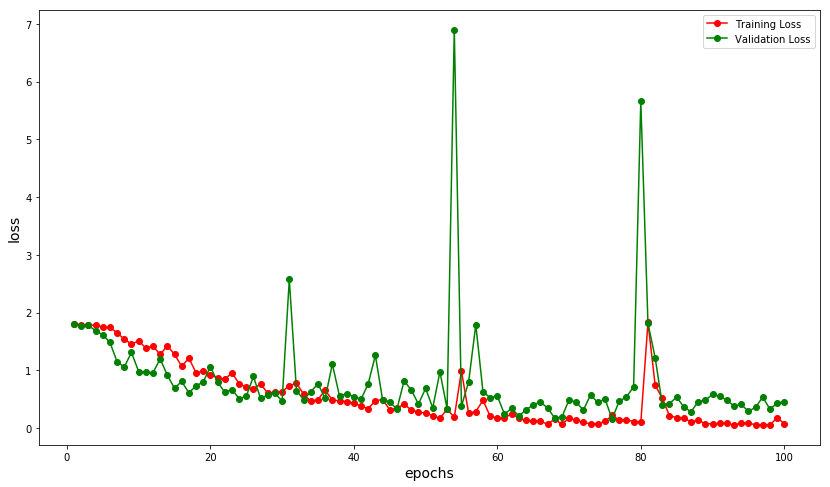

In [126]:
# Making the plot larger
plt.figure(figsize=(14, 8))

loss3_bg = history3_bg.history['loss']                          # Loss on the training data
val_loss3_bg = history3_bg.history['val_loss']                  # Loss on the validation data
epochs = range(1, 101)

plt.plot(epochs, loss3_bg, 'ro-', label='Training Loss')
plt.plot(epochs, val_loss3_bg, 'go-', label = 'Validation Loss')
plt.xlabel('epochs', fontsize=14)
plt.ylabel('loss', fontsize=14)
plt.legend()

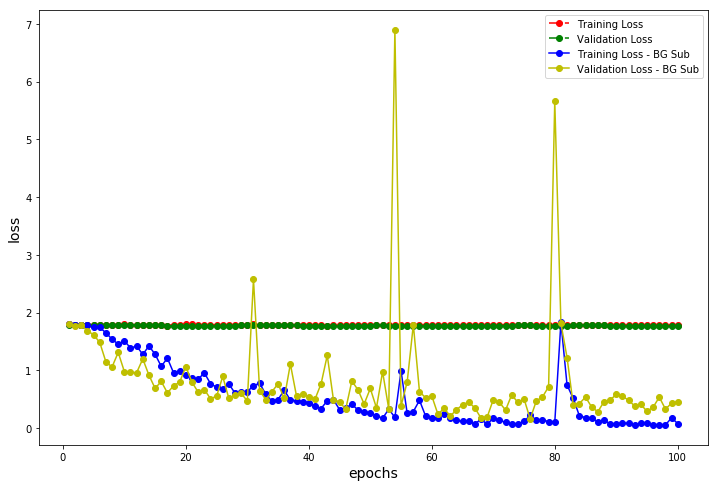

In [127]:
plt.figure(figsize=(12, 8))
plt.plot(epochs, loss3, 'ro-.', label='Training Loss')
plt.plot(epochs, val_loss3, 'go-.', label = 'Validation Loss')
plt.plot(epochs, loss3_bg, 'bo-', label='Training Loss - BG Sub')
plt.plot(epochs, val_loss3_bg, 'yo-', label = 'Validation Loss - BG Sub')
plt.xlabel('epochs', fontsize=14)
plt.ylabel('loss', fontsize=14)
plt.legend()

/home/geet/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in divide
  if sys.path[0] == '':


Normalized confusion matrix


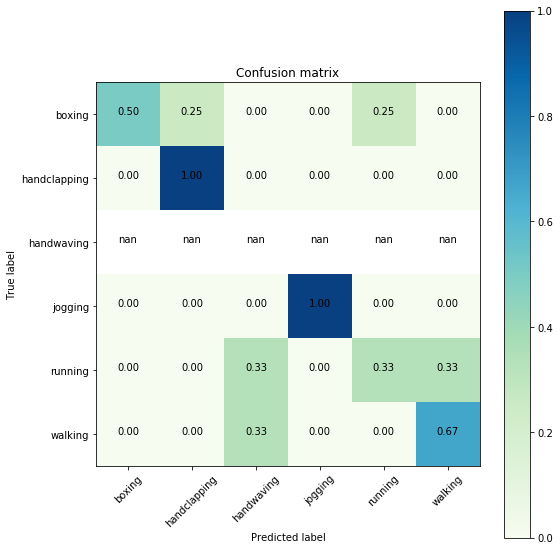

In [128]:
from sklearn.metrics import confusion_matrix
import itertools
y_predictions3_bg = model3_bg.predict_classes(X_test_bgsub);
y_pred3_bg=to_categorical(y_predictions3_bg, num_classes=6).argmax(axis=1);
y_test_cm = y_test.argmax(axis=1);
#print y_predictions[:50]
#print y_test[:50]
model_cnf_matrix3_bg = confusion_matrix(y_test_cm,y_pred3_bg);
confusion_matrix_plot = plot_confusion_matrix(model_cnf_matrix3_bg, 
                                              classes=['boxing', 'handclapping', 'handwaving', 'jogging', 'running', 'walking'], 
                                              normalize=True)


# The model with more dropouts

In [129]:
# from keras.models import Sequential
from keras.layers import Conv3D, MaxPooling3D, GlobalAveragePooling3D, BatchNormalization
from keras.layers.core import Dense, Dropout

# Using the Sequential Model
model10 = Sequential()

# Adding Alternate convolutional and pooling layers
model10.add(Conv3D(filters=16, kernel_size=(5, 5, 5), strides=(1, 1, 1), padding='same', activation='relu', 
                 input_shape=X_train.shape[1:]))
model10.add(Dropout(0.3))
model10.add(MaxPooling3D(pool_size=2, strides=(2, 2, 2), padding='same'))

model10.add(Conv3D(filters=64, kernel_size=(3, 3, 3), strides=(1, 1, 1), padding='same', activation='relu'))
model10.add(Dropout(0.3))
model10.add(MaxPooling3D(pool_size=2, strides=(2, 2, 2), padding='same'))

model10.add(Conv3D(filters=256, kernel_size=(3, 3, 3), strides=(1, 1, 1), padding='same', activation='relu'))
model10.add(Dropout(0.5))
model10.add(MaxPooling3D(pool_size=2, strides=(2, 2, 2), padding='same'))

#model.add(Conv3D(filters=1024, kernel_size=(2, 3, 3), strides=(1, 1, 1), padding='same', activation='relu'))
#model.add(MaxPooling3D(pool_size=2, strides=(2, 2, 2), padding='same'))

# A global average pooling layer to get a 1-d vector
# The vector will have a depth (same as number of elements in the vector) of 1024
model10.add(GlobalAveragePooling3D())

# Hidden layer
model10.add(Dense(32, activation='relu'))

# Dropout Layer
model10.add(Dropout(0.5))

# Output layer
model10.add(Dense(6, activation='softmax'))

model10.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_45 (Conv3D)           (None, 21, 20, 20, 16)    2016      
_________________________________________________________________
dropout_23 (Dropout)         (None, 21, 20, 20, 16)    0         
_________________________________________________________________
max_pooling3d_45 (MaxPooling (None, 11, 10, 10, 16)    0         
_________________________________________________________________
conv3d_46 (Conv3D)           (None, 11, 10, 10, 64)    27712     
_________________________________________________________________
dropout_24 (Dropout)         (None, 11, 10, 10, 64)    0         
_________________________________________________________________
max_pooling3d_46 (MaxPooling (None, 6, 5, 5, 64)       0         
_________________________________________________________________
conv3d_47 (Conv3D)           (None, 6, 5, 5, 256)      442624    
__________

In [130]:
# Imports
from keras.callbacks import ModelCheckpoint

# Compiling the model
model10.compile(loss='categorical_crossentropy', optimizer='nadam', metrics=['accuracy'])

# Saving the model that performed the best on the validation set
checkpoint10 = ModelCheckpoint(filepath='US_Model_10.weights.best.hdf5', save_best_only=True, verbose=1)


history10 = model10.fit(X_train, y_train, batch_size=15, epochs=100, 
                    validation_data=(X_valid, y_valid), verbose=2, callbacks=[checkpoint10])

Train on 152 samples, validate on 22 samples
Epoch 1/100
 - 6s - loss: 1.9525 - acc: 0.1447 - val_loss: 1.7897 - val_acc: 0.2273

Epoch 00001: val_loss improved from inf to 1.78973, saving model to US_Model_10.weights.best.hdf5
Epoch 2/100
 - 4s - loss: 1.7963 - acc: 0.1711 - val_loss: 1.7903 - val_acc: 0.1818

Epoch 00002: val_loss did not improve from 1.78973
Epoch 3/100
 - 4s - loss: 1.7902 - acc: 0.1645 - val_loss: 1.7892 - val_acc: 0.1818

Epoch 00003: val_loss improved from 1.78973 to 1.78919, saving model to US_Model_10.weights.best.hdf5
Epoch 4/100
 - 4s - loss: 1.7915 - acc: 0.1711 - val_loss: 1.7889 - val_acc: 0.1818

Epoch 00004: val_loss improved from 1.78919 to 1.78891, saving model to US_Model_10.weights.best.hdf5
Epoch 5/100
 - 4s - loss: 1.7919 - acc: 0.2105 - val_loss: 1.7859 - val_acc: 0.1818

Epoch 00005: val_loss improved from 1.78891 to 1.78595, saving model to US_Model_10.weights.best.hdf5
Epoch 6/100
 - 4s - loss: 1.7844 - acc: 0.2303 - val_loss: 1.7883 - val_acc


Epoch 00055: val_loss improved from 1.77192 to 1.77171, saving model to US_Model_10.weights.best.hdf5
Epoch 56/100
 - 4s - loss: 1.7842 - acc: 0.1974 - val_loss: 1.7726 - val_acc: 0.1818

Epoch 00056: val_loss did not improve from 1.77171
Epoch 57/100
 - 4s - loss: 1.7827 - acc: 0.1974 - val_loss: 1.7744 - val_acc: 0.1818

Epoch 00057: val_loss did not improve from 1.77171
Epoch 58/100
 - 4s - loss: 1.7879 - acc: 0.1974 - val_loss: 1.7755 - val_acc: 0.1818

Epoch 00058: val_loss did not improve from 1.77171
Epoch 59/100
 - 4s - loss: 1.7870 - acc: 0.1974 - val_loss: 1.7750 - val_acc: 0.1818

Epoch 00059: val_loss did not improve from 1.77171
Epoch 60/100
 - 4s - loss: 1.7868 - acc: 0.1974 - val_loss: 1.7745 - val_acc: 0.1818

Epoch 00060: val_loss did not improve from 1.77171
Epoch 61/100
 - 4s - loss: 1.7902 - acc: 0.1974 - val_loss: 1.7744 - val_acc: 0.1818

Epoch 00061: val_loss did not improve from 1.77171
Epoch 62/100
 - 4s - loss: 1.7886 - acc: 0.1974 - val_loss: 1.7737 - val_ac

In [131]:
# Loading the model that performed the best on the validation set
model10.load_weights('US_Model_10.weights.best.hdf5')

# Testing the model on the Test data
(loss10, accuracy10) = model10.evaluate(X_test, y_test, batch_size=1, verbose=0)

print('Accuracy on test data: {:.2f}%'.format(accuracy10 * 100))

Accuracy on test data: 15.00%


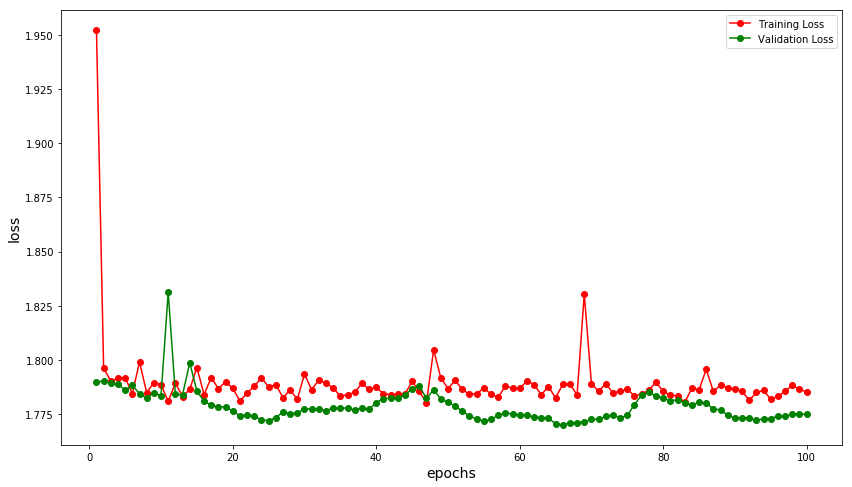

In [132]:
# Making the plot larger
plt.figure(figsize=(14, 8))

loss10 = history10.history['loss']                          # Loss on the training data
val_loss10 = history10.history['val_loss']                  # Loss on the validation data
epochs = range(1, 101)

plt.plot(epochs, loss10, 'ro-', label='Training Loss')
plt.plot(epochs, val_loss10, 'go-', label = 'Validation Loss')
plt.xlabel('epochs', fontsize=14)
plt.ylabel('loss', fontsize=14)
plt.legend()

Normalized confusion matrix


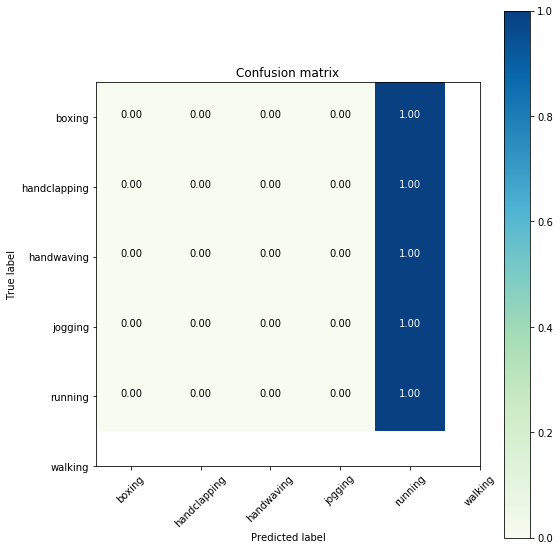

In [133]:
from sklearn.metrics import confusion_matrix
import itertools
y_predictions10 = model10.predict_classes(X_test);
y_pred10=to_categorical(y_predictions10, num_classes=6).argmax(axis=1);
y_test_cm = y_test.argmax(axis=1);

#print y_predictions3[:50]
#print y_test[:50]
model_cnf_matrix10 = confusion_matrix(y_test_cm,y_pred10);
#print(model_cnf_matrix3)
confusion_matrix_plot = plot_confusion_matrix(model_cnf_matrix10, 
                                              classes=['boxing', 'handclapping', 'handwaving', 'jogging', 'running', 'walking'], 
                                              normalize=True)


## Model BG Subtraction more dropouts

In [152]:
from keras.models import Sequential
from keras.layers import Conv3D, MaxPooling3D, GlobalAveragePooling3D, BatchNormalization
from keras.layers.core import Dense, Dropout

# Using the Sequential Model
model10_bg = Sequential()

# Adding Alternate convolutional and pooling layers
model10_bg.add(Conv3D(filters=16, kernel_size=(7, 7,7),strides=(1, 1, 1), padding='same', activation='relu', 
                 input_shape=X_train.shape[1:]))
model10_bg.add(MaxPooling3D(pool_size=2, strides=(2, 2, 2), padding='same'))

#model10_bg.add(Dropout(0.5))
model10_bg.add(Conv3D(filters=32, kernel_size=(5, 5, 5), strides=(1, 1, 1), padding='same', activation='relu'))
model10_bg.add(MaxPooling3D(pool_size=2, strides=(2, 2, 2), padding='same'))
#model10_bg.add(Dropout(0.5))

model10_bg.add(Conv3D(filters=64, kernel_size=(3, 3, 3), strides=(1, 1, 1), padding='same', activation='relu'))
#model10_bg.add(Dropout(0.5))
model10_bg.add(MaxPooling3D(pool_size=2, strides=(2, 2, 2), padding='same'))
model10_bg.add(Dropout(0.5))
#model.add(Conv3D(filters=1024, kernel_size=(2, 3, 3), strides=(1, 1, 1), padding='same', activation='relu'))
#model.add(MaxPooling3D(pool_size=2, strides=(2, 2, 2), padding='same'))

# A global average pooling layer to get a 1-d vector
# The vector will have a depth (same as number of elements in the vector) of 1024
model10_bg.add(GlobalAveragePooling3D())

# Hidden layer
#model10_bg.add(Dropout(0.5))
#model10_bg.add(Dense(256, activation='relu'))
model10_bg.add(Dropout(0.5))
model10_bg.add(Dense(32, activation='relu'))

# Dropout Layer
model10_bg.add(Dropout(0.5))

# Output layer
model10_bg.add(Dense(6, activation='softmax'))

model10_bg.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_60 (Conv3D)           (None, 21, 20, 20, 16)    5504      
_________________________________________________________________
max_pooling3d_60 (MaxPooling (None, 11, 10, 10, 16)    0         
_________________________________________________________________
conv3d_61 (Conv3D)           (None, 11, 10, 10, 32)    64032     
_________________________________________________________________
max_pooling3d_61 (MaxPooling (None, 6, 5, 5, 32)       0         
_________________________________________________________________
conv3d_62 (Conv3D)           (None, 6, 5, 5, 64)       55360     
_________________________________________________________________
max_pooling3d_62 (MaxPooling (None, 3, 3, 3, 64)       0         
_________________________________________________________________
dropout_40 (Dropout)         (None, 3, 3, 3, 64)       0         
__________

In [153]:
##### Imports
from keras.callbacks import ModelCheckpoint
from keras.callbacks import ReduceLROnPlateau
# Compiling the model
model10_bg.compile(loss='categorical_crossentropy', optimizer='nadam', metrics=['accuracy'])

# Saving the model that performed the best on the validation set
checkpoint10_bg = ModelCheckpoint(filepath='US_Model_10_bg.weights.best.hdf5', save_best_only=True, verbose=1)
#reduce_LR = ReduceLROnPlateau(monitor='val_loss', factor=0.95, patience=15, verbose=0, mode='auto', min_delta=0.0001, cooldown=0, min_lr=0)

history10_bg = model10_bg.fit(X_train_bgsub, y_train_bgsub, batch_size=10, epochs=200, 
                    validation_data=(X_valid_bgsub, y_valid_bgsub), verbose=1, callbacks=[checkpoint10_bg])

Train on 152 samples, validate on 22 samples
Epoch 1/200
152/152 [==============================] - 8s 51ms/step - loss: 1.8266 - acc: 0.1447 - val_loss: 1.7930 - val_acc: 0.1364

Epoch 00001: val_loss improved from inf to 1.79305, saving model to US_Model_10_bg.weights.best.hdf5
Epoch 2/200
152/152 [==============================] - 4s 28ms/step - loss: 1.7919 - acc: 0.2105 - val_loss: 1.7875 - val_acc: 0.1364

Epoch 00002: val_loss improved from 1.79305 to 1.78748, saving model to US_Model_10_bg.weights.best.hdf5
Epoch 3/200
152/152 [==============================] - 4s 29ms/step - loss: 1.7920 - acc: 0.1447 - val_loss: 1.7782 - val_acc: 0.2273

Epoch 00003: val_loss improved from 1.78748 to 1.77820, saving model to US_Model_10_bg.weights.best.hdf5
Epoch 4/200
152/152 [==============================] - 4s 29ms/step - loss: 1.7893 - acc: 0.2171 - val_loss: 1.7702 - val_acc: 0.1818

Epoch 00004: val_loss improved from 1.77820 to 1.77020, saving model to US_Model_10_bg.weights.best.hdf5

152/152 [==============================] - 5s 31ms/step - loss: 1.1283 - acc: 0.5395 - val_loss: 0.7020 - val_acc: 0.7273

Epoch 00037: val_loss improved from 0.70475 to 0.70196, saving model to US_Model_10_bg.weights.best.hdf5
Epoch 38/200
152/152 [==============================] - 5s 31ms/step - loss: 0.9183 - acc: 0.6447 - val_loss: 0.6447 - val_acc: 0.7273

Epoch 00038: val_loss improved from 0.70196 to 0.64471, saving model to US_Model_10_bg.weights.best.hdf5
Epoch 39/200
152/152 [==============================] - 5s 30ms/step - loss: 0.9222 - acc: 0.6316 - val_loss: 0.6744 - val_acc: 0.7273

Epoch 00039: val_loss did not improve from 0.64471
Epoch 40/200
152/152 [==============================] - 5s 31ms/step - loss: 0.9257 - acc: 0.6184 - val_loss: 0.6442 - val_acc: 0.7727

Epoch 00040: val_loss improved from 0.64471 to 0.64422, saving model to US_Model_10_bg.weights.best.hdf5
Epoch 41/200
152/152 [==============================] - 5s 31ms/step - loss: 0.9468 - acc: 0.5921 - val

152/152 [==============================] - 5s 30ms/step - loss: 0.1870 - acc: 0.9342 - val_loss: 0.5592 - val_acc: 0.8182

Epoch 00078: val_loss did not improve from 0.30622
Epoch 79/200
152/152 [==============================] - 5s 31ms/step - loss: 0.2686 - acc: 0.8750 - val_loss: 7.9662 - val_acc: 0.4545

Epoch 00079: val_loss did not improve from 0.30622
Epoch 80/200
152/152 [==============================] - 5s 30ms/step - loss: 2.1339 - acc: 0.6513 - val_loss: 0.9368 - val_acc: 0.6818

Epoch 00080: val_loss did not improve from 0.30622
Epoch 81/200
152/152 [==============================] - 5s 30ms/step - loss: 0.5963 - acc: 0.8092 - val_loss: 0.9065 - val_acc: 0.7727

Epoch 00081: val_loss did not improve from 0.30622
Epoch 82/200
152/152 [==============================] - 5s 32ms/step - loss: 0.5312 - acc: 0.8224 - val_loss: 0.8241 - val_acc: 0.8182

Epoch 00082: val_loss did not improve from 0.30622
Epoch 83/200
152/152 [==============================] - 5s 30ms/step - loss: 0

152/152 [==============================] - 5s 30ms/step - loss: 0.1084 - acc: 0.9474 - val_loss: 0.4032 - val_acc: 0.9545

Epoch 00121: val_loss did not improve from 0.26172
Epoch 122/200
152/152 [==============================] - 5s 30ms/step - loss: 0.1528 - acc: 0.9671 - val_loss: 0.4580 - val_acc: 0.8182

Epoch 00122: val_loss did not improve from 0.26172
Epoch 123/200
152/152 [==============================] - 5s 30ms/step - loss: 0.1046 - acc: 0.9671 - val_loss: 0.5776 - val_acc: 0.8636

Epoch 00123: val_loss did not improve from 0.26172
Epoch 124/200
152/152 [==============================] - 5s 30ms/step - loss: 0.1034 - acc: 0.9605 - val_loss: 0.6586 - val_acc: 0.8636

Epoch 00124: val_loss did not improve from 0.26172
Epoch 125/200
152/152 [==============================] - 5s 30ms/step - loss: 0.0615 - acc: 0.9737 - val_loss: 0.6775 - val_acc: 0.8636

Epoch 00125: val_loss did not improve from 0.26172
Epoch 126/200
152/152 [==============================] - 5s 30ms/step - lo

152/152 [==============================] - 5s 30ms/step - loss: 0.0924 - acc: 0.9539 - val_loss: 1.1463 - val_acc: 0.8636

Epoch 00164: val_loss did not improve from 0.16497
Epoch 165/200
152/152 [==============================] - 5s 30ms/step - loss: 0.1373 - acc: 0.9671 - val_loss: 0.2186 - val_acc: 0.9545

Epoch 00165: val_loss did not improve from 0.16497
Epoch 166/200
152/152 [==============================] - 5s 30ms/step - loss: 0.0823 - acc: 0.9671 - val_loss: 0.0859 - val_acc: 0.9545

Epoch 00166: val_loss improved from 0.16497 to 0.08589, saving model to US_Model_10_bg.weights.best.hdf5
Epoch 167/200
152/152 [==============================] - 5s 30ms/step - loss: 0.0553 - acc: 0.9737 - val_loss: 0.4077 - val_acc: 0.9545

Epoch 00167: val_loss did not improve from 0.08589
Epoch 168/200
152/152 [==============================] - 5s 30ms/step - loss: 0.0480 - acc: 0.9934 - val_loss: 0.2200 - val_acc: 0.9545

Epoch 00168: val_loss did not improve from 0.08589
Epoch 169/200
152/15

In [154]:
# Loading the model that performed the best on the validation set
model10_bg.load_weights('US_Model_10_bg.weights.best.hdf5')

# Testing the model on the Test data
(loss10_bg, accuracy10_bg) = model10_bg.evaluate(X_test_bgsub, y_test_bgsub, batch_size=1, verbose=0)

print('Accuracy on test data: {:.2f}%'.format(accuracy10_bg * 100))

Accuracy on test data: 80.00%


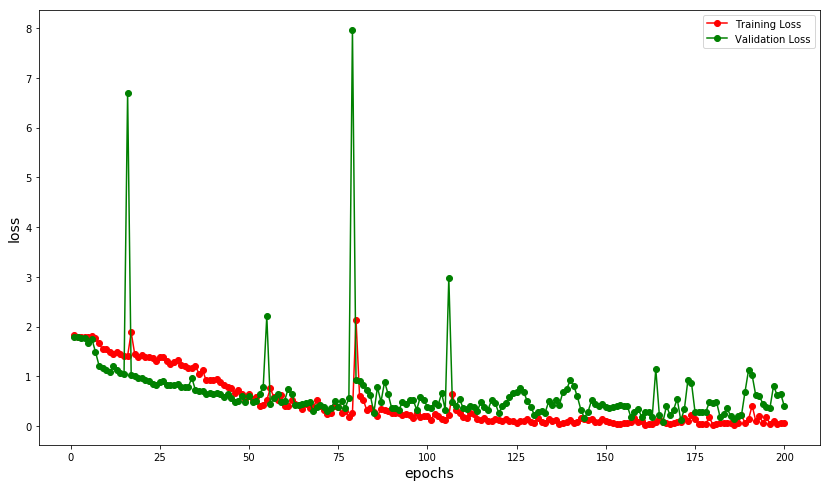

In [155]:
# Making the plot larger
plt.figure(figsize=(14, 8))

loss10_bg = history10_bg.history['loss']                          # Loss on the training data
val_loss10_bg = history10_bg.history['val_loss']                  # Loss on the validation data
epochs = range(1, 201)

plt.plot(epochs, loss10_bg, 'ro-', label='Training Loss')
plt.plot(epochs, val_loss10_bg, 'go-', label = 'Validation Loss')
plt.xlabel('epochs', fontsize=14)
plt.ylabel('loss', fontsize=14)
plt.legend()

ValueError: x and y must have same first dimension, but have shapes (200,) and (100,)

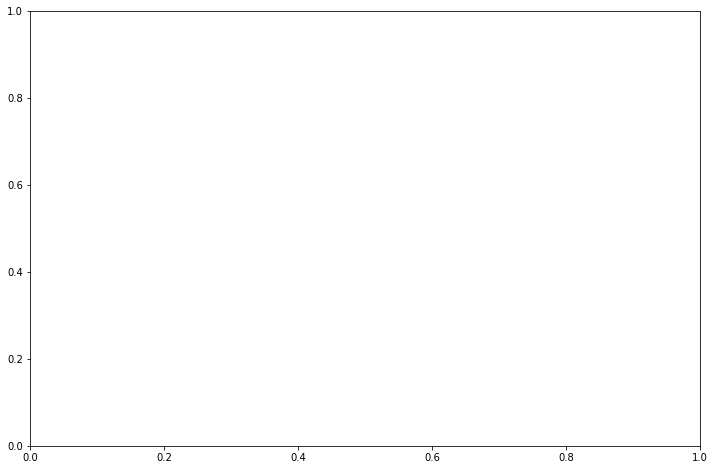

In [138]:
plt.figure(figsize=(12, 8))
plt.plot(epochs, loss10, 'ro-.', label='Training Loss')
plt.plot(epochs, val_loss10, 'go-.', label = 'Validation Loss')
plt.plot(epochs, loss10_bg, 'bo-', label='Training Loss - BG Sub')
plt.plot(epochs, val_loss10_bg, 'yo-', label = 'Validation Loss - BG Sub')
plt.xlabel('epochs', fontsize=14)
plt.ylabel('loss', fontsize=14)
plt.legend()

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools
y_predictions10_bg = model10_bg.predict_classes(X_test_bgsub);
y_pred10_bg=to_categorical(y_predictions10_bg, num_classes=6).argmax(axis=1);
y_test_cm = y_test.argmax(axis=1);
#print y_predictions[:50]
#print y_test[:50]
model_cnf_matrix10_bg = confusion_matrix(y_test_cm,y_pred10_bg);
confusion_matrix_plot = plot_confusion_matrix(model_cnf_matrix10_bg, 
                                              classes=['boxing', 'handclapping', 'handwaving', 'jogging', 'running', 'walking'], 
                                              normalize=True)
